In [89]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

pd.set_option("display.max_columns", None)
%matplotlib inline

In [90]:
sl_df = pd.read_excel(r"C:\Users\jaske\Desktop\studies\OneDrive\Machine Learning\assignment\Rel_2_Nutrient_file.xlsx",
                      sheet_name = "All solids & liquids per 100g")

l_df = pd.read_excel(r"C:\Users\jaske\Desktop\studies\OneDrive\Machine Learning\assignment\Rel_2_Nutrient_file.xlsx",
                      sheet_name = "Liquids only per 100mL", skiprows = [1])

In [91]:
sl_df.columns = sl_df.columns.str.replace("\n", "")
l_df.columns = l_df.columns.str.replace("\n", "")

sl_df.columns = sl_df.columns.str.title()
l_df.columns = l_df.columns.str.title()

# Basic Statistics

In [92]:
sl_statistics = pd.DataFrame(sl_df.describe())
print("Solid & Liquid Statistics:")
sl_statistics

Solid & Liquid Statistics:


Classification  Energy With Dietary Fibre, Equated (Kj)  \
count     1614.000000                              1616.000000   
mean     18760.882900                               845.643564   
std       5062.646828                               702.908930   
min         20.000000                                 0.000000   
25%      15101.000000                               306.750000   
50%      18102.000000                               662.500000   
75%      23107.000000                              1214.500000   
max      34101.000000                              3703.000000   

       Energy, Without Dietary Fibre, Equated (Kj)  Moisture (Water) (G)  \
count                                  1616.000000           1616.000000   
mean                                    823.602723             57.143193   
std                                     696.848908             29.319870   
min                                       0.000000              0.000000   
25%                                     294.750000             34.700000   
50%                                     658.500000             65.200000   
75%                                    1154.000000             79.600000   
max                                    3703.000000            100.000000   

       Protein (G)  Nitrogen (G)  Fat, Total (G)      Ash (G)  \
count  1616.000000   1616.000000     1616.000000  1616.000000   
mean     12.439233      2.012735        9.495730     1.874876   
std      11.278716      1.821698       16.903693     5.122109   
min       0.000000      0.000000        0.000000     0.000000   
25%       2.175000      0.340000        0.400000     0.700000   
50%       9.350000      1.550000        3.000000     1.200000   
75%      21.900000      3.510000       10.200000     1.800000   
max      85.000000     15.200000      100.000000    99.800000   

       Total Dietary Fibre (G)  Alcohol (G)  Fructose (G)  Glucose (G)  \
count              1616.000000  1616.000000   1406.000000  1424.000000   
mean                  2.676980     0.179827      1.105761     1.099719   
std                   5.970007     1.633011      3.337553     3.133692   
min                   0.000000     0.000000      0.000000     0.000000   
25%                   0.000000     0.000000      0.000000     0.000000   
50%                   0.500000     0.000000      0.000000     0.000000   
75%                   3.000000     0.000000      0.600000     0.800000   
max                  88.700000    34.400000     40.000000    35.800000   

        Sucrose(G)  Maltose (G)  Lactose (G)  Galactose (G)  Maltotrios (G)  \
count  1424.000000  1389.000000  1414.000000     168.000000       19.000000   
mean      3.074438     0.227214     0.400141       0.057738        1.415789   
std      10.519684     0.826694     2.575171       0.318585        2.583551   
min       0.000000     0.000000     0.000000       0.000000        0.000000   
25%       0.000000     0.000000     0.000000       0.000000        0.000000   
50%       0.000000     0.000000     0.000000       0.000000        0.100000   
75%       1.000000     0.000000     0.000000       0.000000        1.700000   
max     100.000000    14.000000    56.000000       2.500000       11.000000   

       Total Sugars (G)  Added Sugars (G)  Free Sugars (G)   Starch (G)  \
count       1616.000000       1616.000000      1616.000000  1616.000000   
mean           5.890780          3.246287         3.453094     9.148082   
std           13.361203         11.453131        11.680445    17.809492   
min            0.000000          0.000000         0.000000     0.000000   
25%            0.000000          0.000000         0.000000     0.000000   
50%            0.900000          0.000000         0.000000     0.000000   
75%            4.700000          0.000000         0.000000     8.000000   
max          100.000000        100.000000       100.000000    84.400000   

       Dextrin (G)  Glycerol (G)  Glycogen (G)  Inulin (G)  Erythritol (G)  \
count   

In [93]:
l_statistics = pd.DataFrame(l_df.describe())
print("Liquid Statistics:")
l_statistics

Liquid Statistics:


Classification  Energy With Dietary Fibre, Equated (Kj)  \
count      189.000000                               189.000000   
mean     19348.089947                               673.804233   
std       6438.857942                               963.025866   
min         20.000000                                 0.000000   
25%      14401.000000                               159.000000   
50%      19305.000000                               293.000000   
75%      23107.000000                               574.000000   
max      32102.000000                              3404.000000   

       Energy, Without Dietary Fibre, Equated (Kj)  Moisture (Water) (G)  \
count                                   189.000000            189.000000   
mean                                    670.248677             76.659788   
std                                     962.193691             29.595268   
min                                       0.000000              0.000000   
25%                                     158.000000             74.000000   
50%                                     293.000000             88.300000   
75%                                     571.000000             93.700000   
max                                    3404.000000            112.900000   

       Protein (G)  Nitrogen (G)  Fat, Total (G)     Ash (G)  \
count   189.000000    189.000000      189.000000  189.000000   
mean      1.638095      0.264180       11.551323    1.029101   
std       2.703057      0.432222       26.910365    2.579306   
min       0.000000      0.000000        0.000000    0.000000   
25%       0.100000      0.020000        0.000000    0.100000   
50%       0.400000      0.060000        0.300000    0.300000   
75%       2.000000      0.320000        3.800000    0.900000   
max      20.400000      3.260000       92.000000   25.200000   

       Total Dietary Fibre (G)  Alcohol (G)  Fructose (G)  Glucose (G)  \
count               189.000000   189.000000    164.000000   164.000000   
mean                  0.442328     1.344974      2.284146     2.437805   
std                   1.443034     3.837350      6.232676     6.016687   
min                   0.000000     0.000000      0.000000     0.000000   
25%                   0.000000     0.000000      0.000000     0.000000   
50%                   0.000000     0.000000      0.100000     0.400000   
75%                   0.200000     0.000000      1.825000     2.225000   
max                  13.500000    29.500000     57.200000    44.300000   

       Sucrose(G)  Maltose (G)  Lactose (G)  Galactose (G)  Maltotrios (G)  \
count  165.000000   163.000000   163.000000      45.000000        6.000000   
mean     3.478182     0.236196     0.945399       0.191111        2.583333   
std      8.627106     1.574403     2.292425       0.594987        6.230062   
min      0.000000     0.000000     0.000000       0.000000        0.000000   
25%      0.000000     0.000000     0.000000       0.000000        0.000000   
50%      0.700000     0.000000     0.000000       0.000000        0.050000   
75%      3.300000     0.000000     0.000000       0.000000        0.100000   
max     77.600000    19.500000    14.700000       2.600000       15.300000   

       Total Sugars (G)  Added Sugars (G)  Free Sugars (G)  Starch (G)  \
count        189.000000        189.000000       189.000000  189.000000   
mean           9.206349          6.270370         7.691534    0.904762   
std           16.257946         14.534393        16.116802    1.988539   
min            0.000000          0.000000         0.000000    0.000000   
25%            0.200000          0.000000         0.000000    0.000000   
50%            4.100000          0.000000         0.800000    0.000000   
75%           10.700000          6.600000         8.600000    0.800000   
max          107.800000        107.800000       107.800000   10.700000   

       Dextrin (G)  Glycerol (G)  Glycogen (G)  Inulin (G)  Erythritol(G)  \
count     6.000000           0.0    

In [94]:
type_df = pd.DataFrame({"Column": sl_df.columns, "Non-Null Count": sl_df.count(), "Data-Type": sl_df.dtypes})
type_df.reset_index(drop = True, inplace = True)
sl_type_df = type_df.transpose()
sl_type_df.columns = sl_type_df.iloc[0]
sl_type_df = sl_type_df[1:]
sl_type_df.index = ["Solid & Liquid Non-Null Count", "Solid & Liquid Data-Type"]

type_df = pd.DataFrame({"Column": l_df.columns, "Non-Null Count": l_df.count(), "Data-Type": l_df.dtypes})
type_df.reset_index(drop = True, inplace = True)
l_type_df = type_df.transpose()
l_type_df.columns = l_type_df.iloc[0]
l_type_df = l_type_df[1:]
l_type_df.index = ["Liquid Non-Null Count", "Liquid Data-Type"]

pd.concat([sl_type_df, l_type_df], axis = 0)

Column                        Public Food Key Classification Food Name  \
Solid & Liquid Non-Null Count            1616           1614      1616   
Solid & Liquid Data-Type               object        float64    object   
Liquid Non-Null Count                     189            189       189   
Liquid Data-Type                       object          int64    object   

Column                        Energy With Dietary Fibre, Equated (Kj)  \
Solid & Liquid Non-Null Count                                    1616   
Solid & Liquid Data-Type                                        int64   
Liquid Non-Null Count                                             189   
Liquid Data-Type                                                int64   

Column                        Energy, Without Dietary Fibre, Equated (Kj)  \
Solid & Liquid Non-Null Count                                        1616   
Solid & Liquid Data-Type                                            int64   
Liquid Non-Null Count                                                 189   
Liquid Data-Type                                                    int64   

Column                        Moisture (Water) (G) Protein (G) Nitrogen (G)  \
Solid & Liquid Non-Null Count                 1616        1616         1616   
Solid & Liquid Data-Type                   float64     float64      float64   
Liquid Non-Null Count                          189         189          189   
Liquid Data-Type                           float64     float64      float64   

Column                        Fat, Total (G)  Ash (G) Total Dietary Fibre (G)  \
Solid & Liquid Non-Null Count           1616     1616                    1616   
Solid & Liquid Data-Type             float64  float64                 float64   
Liquid Non-Null Count                    189      189                     189   
Liquid Data-Type                     float64  float64                 float64   

Column                        Alcohol (G) Fructose (G) Glucose (G) Sucrose(G)  \
Solid & Liquid Non-Null Count        1616         1406        1424       1424   
Solid & Liquid Data-Type          float64      float64     float64    float64   
Liquid Non-Null Count                 189          164         164        165   
Liquid Data-Type                  float64      float64     float64    float64   

Column                        Maltose (G) Lactose (G) Galactose (G)  \
Solid & Liquid Non-Null Count        1389        1414           168   
Solid & Liquid Data-Type          float64     float64       float64   
Liquid Non-Null Count                 163         163            45   
Liquid Data-Type                  float64     float64       float64   

Column                        Maltotrios (G) Total Sugars (G)  \
Solid & Liquid Non-Null Count             19             1616   
Solid & Liquid Data-Type             float64          float64   
Liquid Non-Null Count                      6              189   
Liquid Data-Type                     float64          float64   

Column                        Added Sugars (G) Free Sugars (G) Starch (G)  \
Solid & Liquid Non-Null Count             1616            1616       1616   
Solid & Liquid Data-Type               float64         float64    float64   
Liquid Non-Null Count                      189             189        189   
Liquid Data-Type                       float64         float64    float64   

Column                        Dextrin (G) Glycerol (G) Glycogen (G)  \
Solid & Liquid Non-Null Count           7            1            9   
Solid & Liquid Data-Type          float64      float64      float64   
Liquid Non-Null Count                   6            0            0   
Liquid Data-Type                  float64      float64      float64   

Column                        Inulin (G) Erythritol (G) Maltitol (G)  \
Solid & Liquid Non-Null Count         37              1            1   
Solid & Liquid Data-Type         float64        float64      float64   
Liquid Non-Null Count        

In [95]:
print("Number of Unique Values in Solid & Liquid and Liquid:")

sl_unique_df = pd.DataFrame(sl_df.nunique()).transpose()
sl_unique_df.index = ["Solid & Liquid"]
l_unique_df = pd.DataFrame(l_df.nunique()).transpose()
l_unique_df.index = ["Liquid"]

pd.concat([sl_unique_df, l_unique_df], axis = 0)

Number of Unique Values in Solid & Liquid and Liquid:


Public Food Key  Classification  Food Name  \
Solid & Liquid             1616             290       1616   
Liquid                      189              83        189   

                Energy With Dietary Fibre, Equated (Kj)  \
Solid & Liquid                                     1037   
Liquid                                              144   

                Energy, Without Dietary Fibre, Equated (Kj)  \
Solid & Liquid                                         1037   
Liquid                                                  146   

                Moisture (Water) (G)  Protein (G)  Nitrogen (G)  \
Solid & Liquid                   691          337           476   
Liquid                           128           53            62   

                Fat, Total (G)  Ash (G)  Total Dietary Fibre (G)  Alcohol (G)  \
Solid & Liquid             333      100                      170           29   
Liquid                      53       36                       23           29   

                Fructose (G)  Glucose (G)  Sucrose(G)  Maltose (G)  \
Solid & Liquid           105          104         164           42   
Liquid                    48           48          60           14   

                Lactose (G)  Galactose (G)  Maltotrios (G)  Total Sugars (G)  \
Solid & Liquid           64              8              10               275   
Liquid                   28              6               3               101   

                Added Sugars (G)  Free Sugars (G)  Starch (G)  Dextrin (G)  \
Solid & Liquid               187              200         354            6   
Liquid                        62               78          40            6   

                Glycerol (G)  Glycogen (G)  Inulin (G)  Erythritol (G)  \
Solid & Liquid             1             5          25             1.0   
Liquid                     0             0           0             NaN   

                Maltitol (G)  Mannitol (G)  Xylitol (G)  Maltodextrin (G)  \
Solid & Liquid             1             9            1                12   
Liquid                     0             0            0                 6   

                Oligosaccharides  (G)  Polydextrose (G)  Raffinose (G)  \
Solid & Liquid                    1.0                 1            7.0   
Liquid                            NaN                 0            NaN   

                Stachyose (G)  Sorbitol (G)  Resistant Starch (G)  \
Solid & Liquid              6            21                    22   
Liquid                      1             7                     0   

                Available Carbohydrate, Without Sugar Alcohols (G)  \
Solid & Liquid                                                469    
Liquid                                                         99    

                Available Carbohydrate, With Sugar Alcohols (G)  \
Solid & Liquid                                              470   
Liquid                                                      100   

                Acetic Acid (G)  Citric Acid (G)  Fumaric Acid (G)  \
Solid & Liquid               18               27                 1   
Liquid                       12               14                 0   

                Lactic Acid (G)  Malic Acid (G)  Oxalic Acid (G)  \
Solid & Liquid               20              14                7   
Liquid                       13               9                2   

                Propionic Acid (G)  Quinic Acid (G)  Shikimic Acid (G)  \
Solid & Liquid                   3                9                  1   
Liquid                           1                2                  0   

                Succinic Acid (G)  Tartaric Acid (G)  Aluminium (Al) (Ug)  \
Solid & Liquid                  3                  6                  157   
Liquid                          3                  4                   45   

                Antimony (Sb) (Ug)  Arsenic (As) (Ug)  Cadmium (Cd) (Ug)  \
Solid & Liquid                  17                 85                 55   
Liquid

In [96]:
print("Shape of the Solid & Liquid Dataframe:", str(sl_df.shape))
print("Shape of the Liquid Dataframe:", str(l_df.shape))

Shape of the Solid & Liquid Dataframe: (1616, 293)
Shape of the Liquid Dataframe: (189, 204)


# Preprocessing

# Feature Engineering

In [97]:
liquid = list(l_df["Classification"])

sl_df["Type"] = None
l_df["Type"] = None

l_df.loc[l_df["Classification"].isin(liquid), "Type"] = 1
sl_df.loc[sl_df["Classification"].isin(liquid), "Type"] = 1
sl_df.loc[~sl_df["Classification"].isin(liquid), "Type"] = 0

### Dropping Columns with large percentage of nulls

In [98]:
sl_percent_nulls = (sl_df.isnull().sum() / len(sl_df)) * 100
sl_percent_nulls = sl_percent_nulls.to_frame(name = "Percentage Nulls Solid and Liquid").transpose()

l_percent_nulls = (l_df.isnull().sum() / len(l_df)) * 100
l_percent_nulls = l_percent_nulls.to_frame(name = "Percentage Nulls Liquid").transpose()

pd.concat([sl_percent_nulls, l_percent_nulls], axis = 0)

Public Food Key  Classification  Food Name  \
Percentage Nulls Solid and Liquid              0.0        0.123762        0.0   
Percentage Nulls Liquid                        0.0        0.000000        0.0   

                                   Energy With Dietary Fibre, Equated (Kj)  \
Percentage Nulls Solid and Liquid                                      0.0   
Percentage Nulls Liquid                                                0.0   

                                   Energy, Without Dietary Fibre, Equated (Kj)  \
Percentage Nulls Solid and Liquid                                          0.0   
Percentage Nulls Liquid                                                    0.0   

                                   Moisture (Water) (G)  Protein (G)  \
Percentage Nulls Solid and Liquid                   0.0          0.0   
Percentage Nulls Liquid                             0.0          0.0   

                                   Nitrogen (G)  Fat, Total (G)  Ash (G)  \
Percentage Nulls Solid and Liquid           0.0             0.0      0.0   
Percentage Nulls Liquid                     0.0             0.0      0.0   

                                   Total Dietary Fibre (G)  Alcohol (G)  \
Percentage Nulls Solid and Liquid                      0.0          0.0   
Percentage Nulls Liquid                                0.0          0.0   

                                   Fructose (G)  Glucose (G)  Sucrose(G)  \
Percentage Nulls Solid and Liquid     12.995050    11.881188   11.881188   
Percentage Nulls Liquid               13.227513    13.227513   12.698413   

                                   Maltose (G)  Lactose (G)  Galactose (G)  \
Percentage Nulls Solid and Liquid    14.047030    12.500000      89.603960   
Percentage Nulls Liquid              13.756614    13.756614      76.190476   

                                   Maltotrios (G)  Total Sugars (G)  \
Percentage Nulls Solid and Liquid       98.824257               0.0   
Percentage Nulls Liquid                 96.825397               0.0   

                                   Added Sugars (G)  Free Sugars (G)  \
Percentage Nulls Solid and Liquid               0.0              0.0   
Percentage Nulls Liquid                         0.0              0.0   

                                   Starch (G)  Dextrin (G)  Glycerol (G)  \
Percentage Nulls Solid and Liquid         0.0    99.566832     99.938119   
Percentage Nulls Liquid                   0.0    96.825397    100.000000   

                                   Glycogen (G)  Inulin (G)  Erythritol (G)  \
Percentage Nulls Solid and Liquid     99.443069   97.710396       99.938119   
Percentage Nulls Liquid              100.000000  100.000000             NaN   

                                   Maltitol (G)  Mannitol (G)  Xylitol (G)  \
Percentage Nulls Solid and Liquid     99.938119     98.886139    99.938119   
Percentage Nulls Liquid              100.000000    100.000000   100.000000   

                                   Maltodextrin (G)  Oligosaccharides  (G)  \
Percentage Nulls Solid and Liquid         99.195545              99.938119   
Percentage Nulls Liquid                   96.296296                    NaN   

                                   Polydextrose (G)  Raffinose (G)  \
Percentage Nulls Solid and Liquid         99.938119      98.824257   
Percentage Nulls Liquid                  100.000000            NaN   

                                   Stachyose (G)  Sorbitol (G)  \
Percentage Nulls Solid and Liquid      99.009901     94.678218   
Percentage Nulls Liquid                97.883598     94.179894   

                                   Resistant Starch (G)  \
Percentage Nulls Solid and Liquid             92.883663   
Percentage Nulls Liquid                      100.000000   

                                   Available Carbohydrate, Without Sugar Alcohols (G)  \
Percentage Nulls Solid and Liquid                                                0.0    
Percentage Nulls Liquid                

In [99]:
#Dropping Columns based on percentage
sl_df.dropna(thresh = round(len(sl_df) * 0.5, 1), axis = 1, inplace = True)
sl_df.dropna(subset = ["Classification"], inplace = True)
print("Shape of the Solid & Liquid Dataframe:", str(sl_df.shape))

Shape of the Solid & Liquid Dataframe: (1614, 101)


In [100]:
l_df.dropna(thresh = round(len(l_df) * 0.5, 1), axis = 1, inplace = True)
l_df.dropna(subset = ["Classification"], inplace = True)
print("Shape of the Liquid Dataframe:", str(l_df.shape))

Shape of the Liquid Dataframe: (189, 84)


### Dropping Duplicates

In [101]:
sl_df.drop_duplicates(inplace = True)
print("Shape of the Solid & Liquid Dataframe:", str(sl_df.shape))

Shape of the Solid & Liquid Dataframe: (1614, 101)


In [102]:
l_df.drop_duplicates(inplace = True)
print("Shape of the Liquid Dataframe:", str(l_df.shape))

Shape of the Liquid Dataframe: (189, 84)


### Filling missing Values with mean and mode

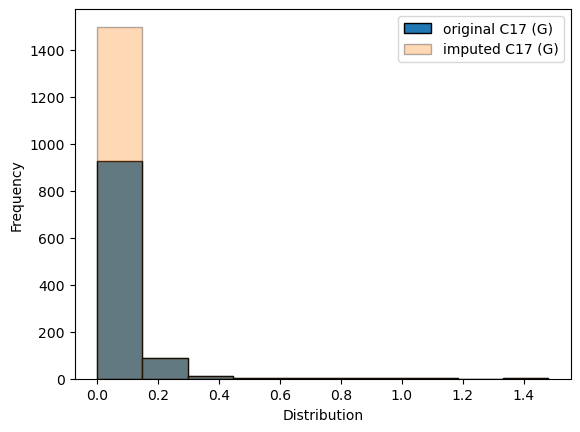

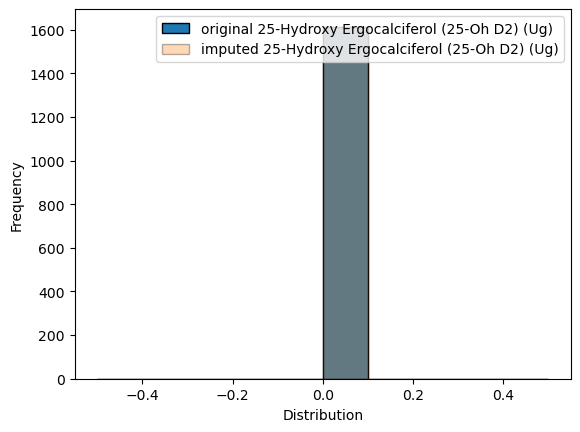

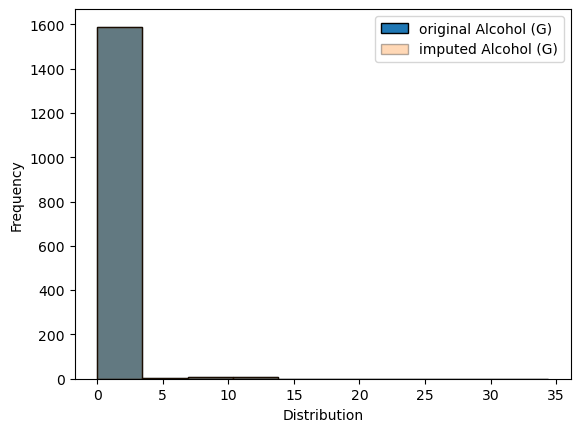

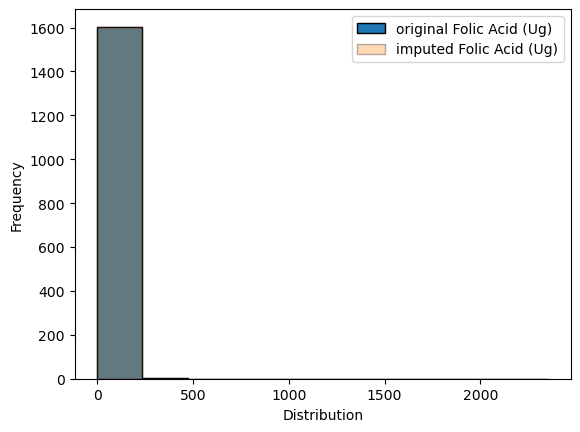

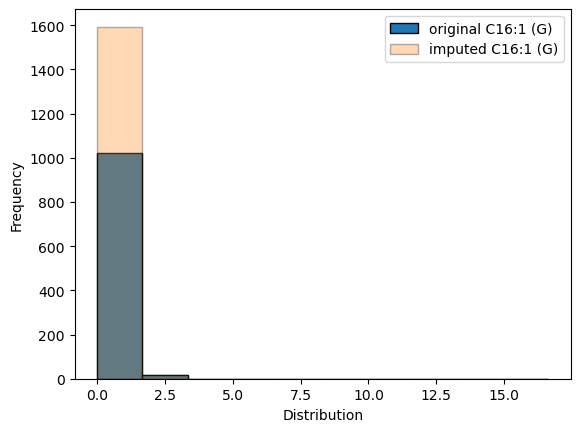

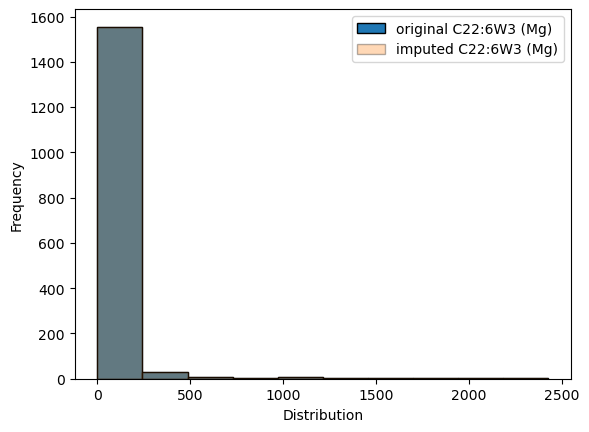

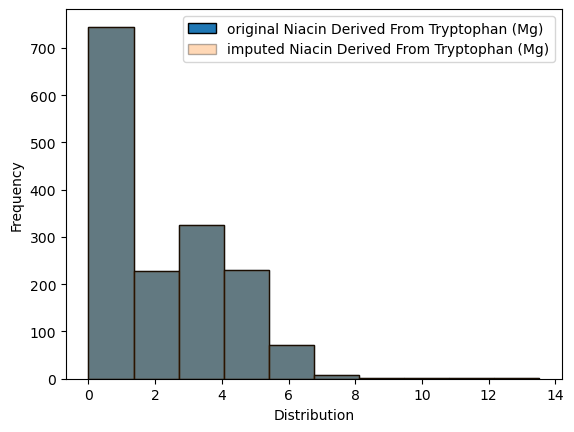

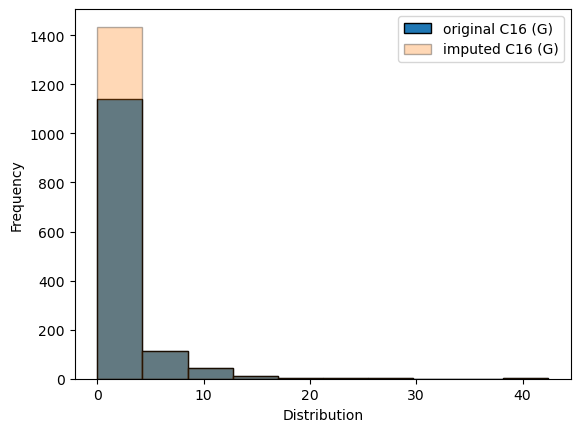

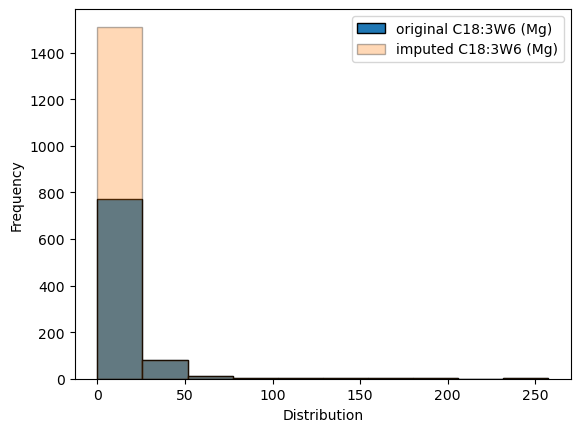

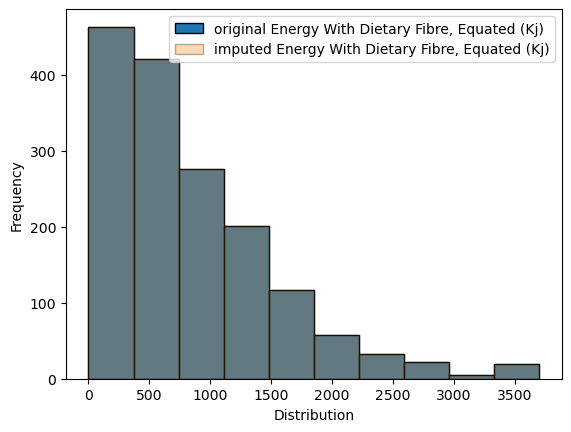

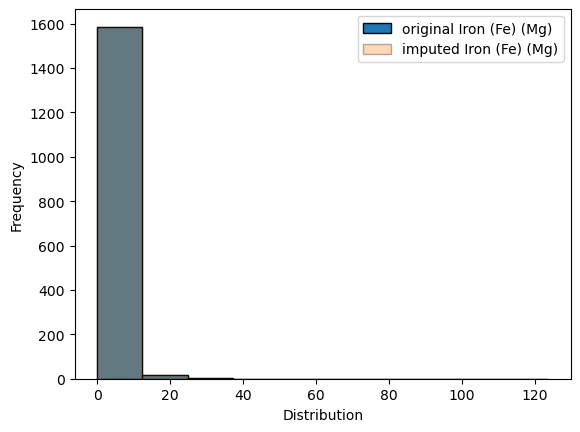

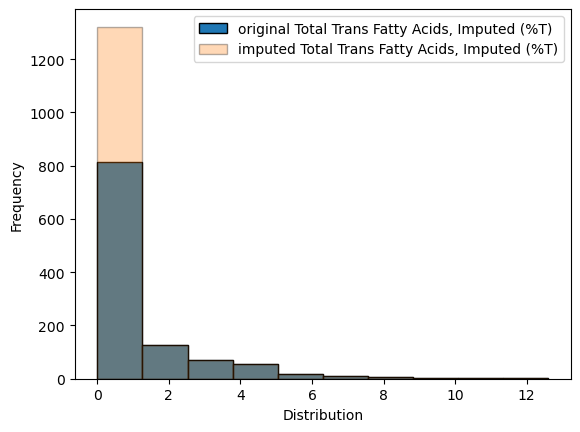

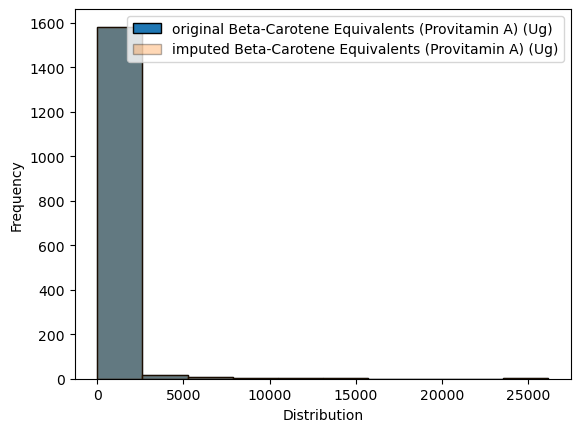

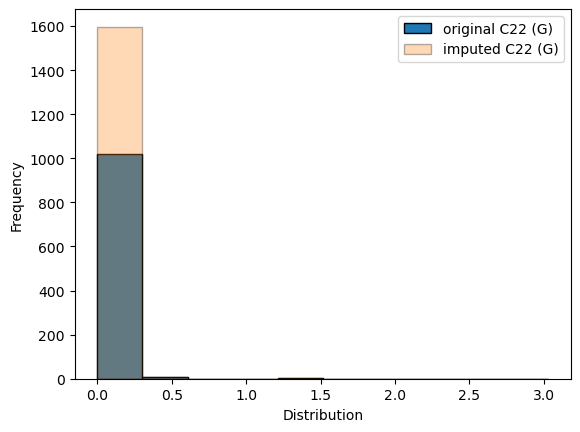

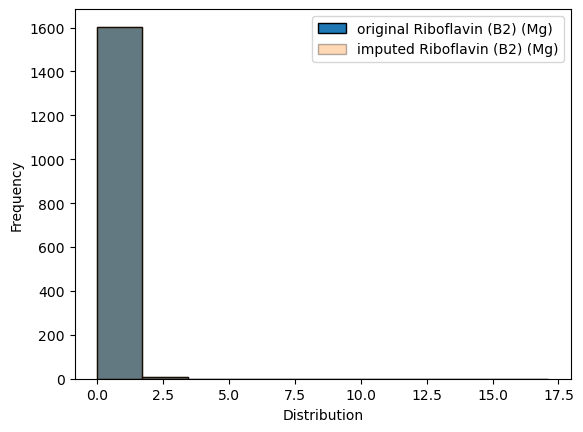

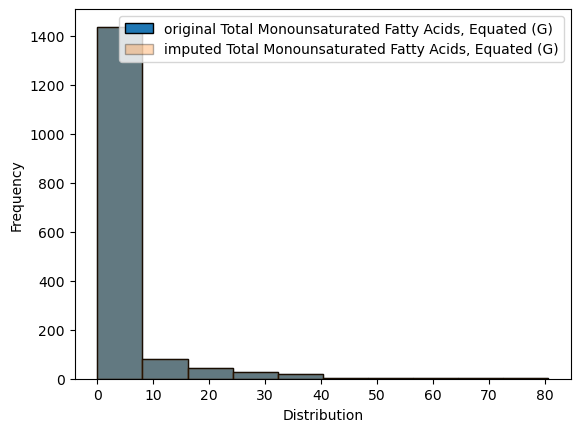

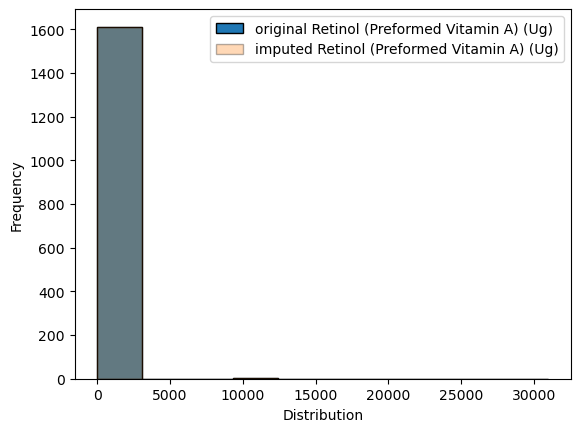

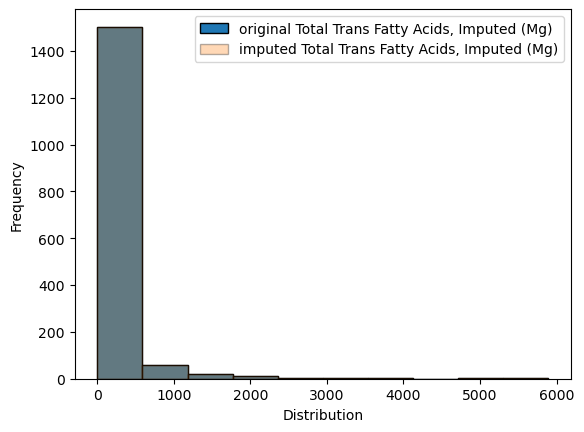

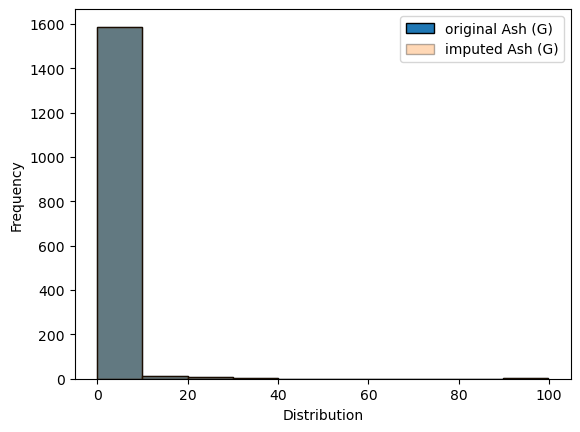

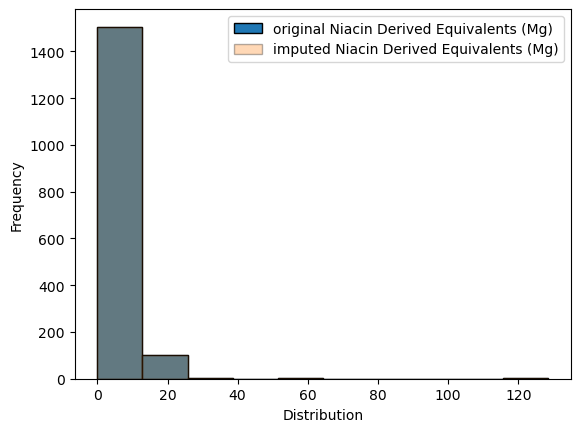

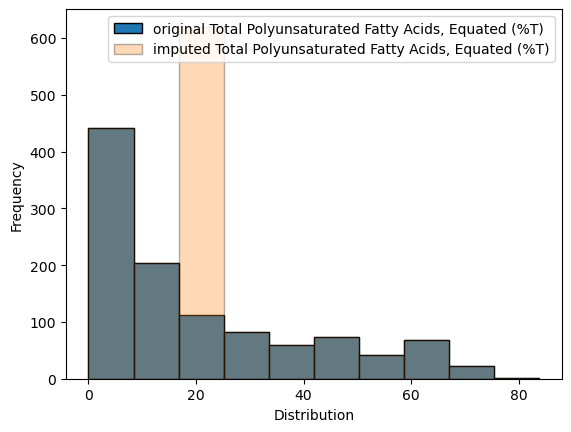

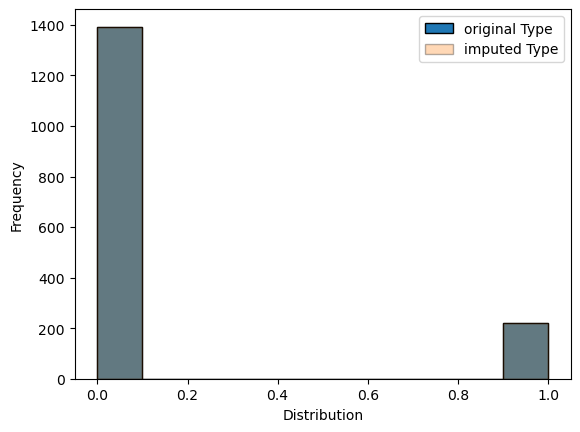

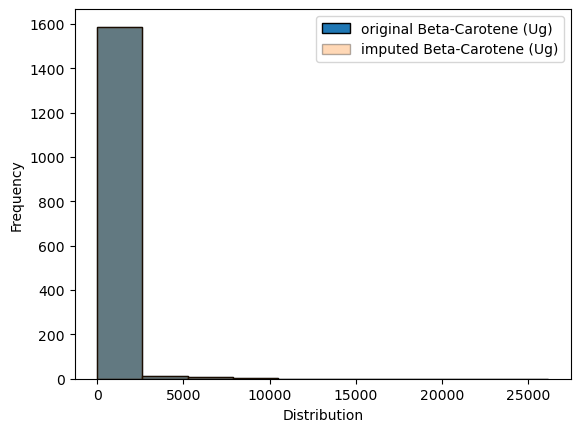

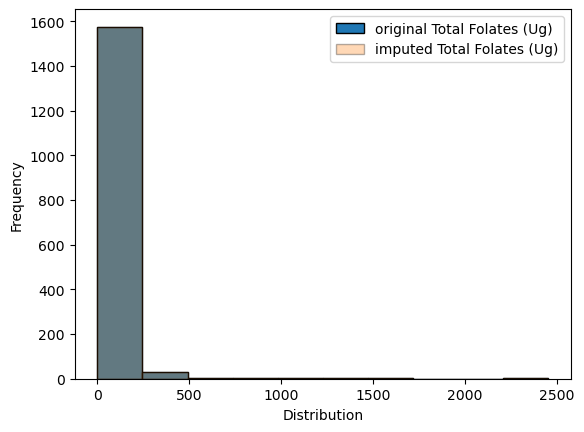

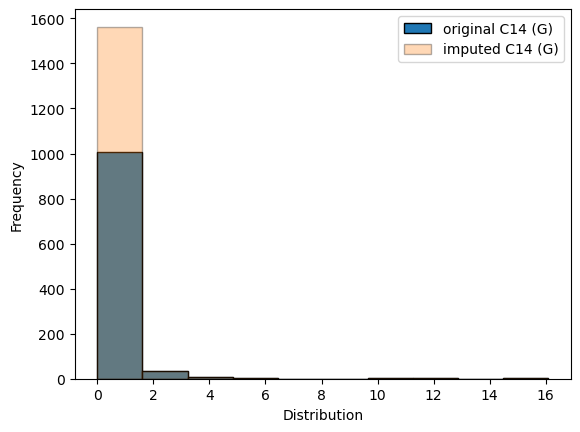

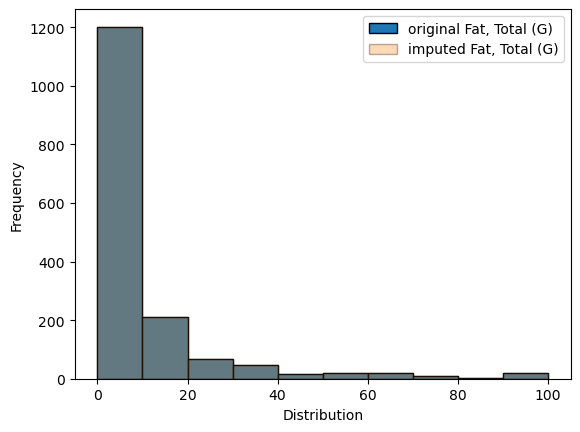

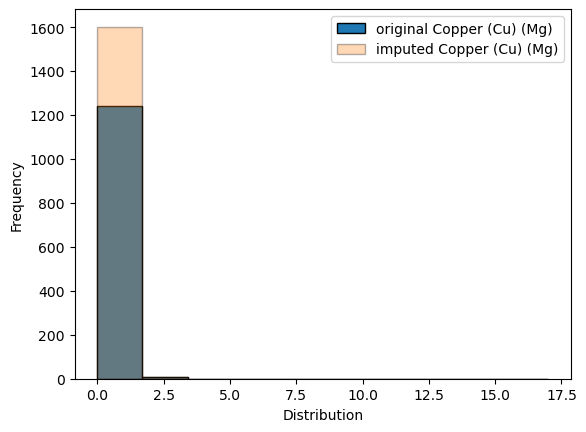

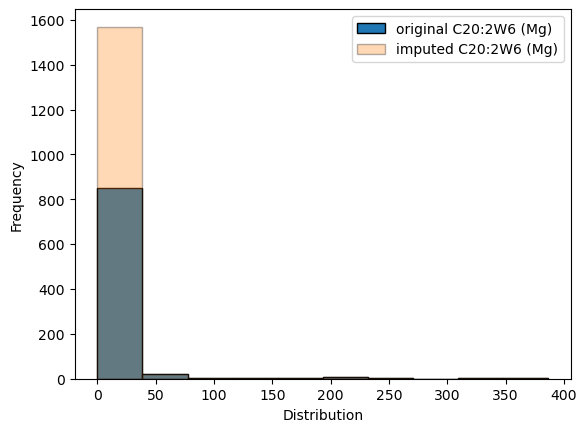

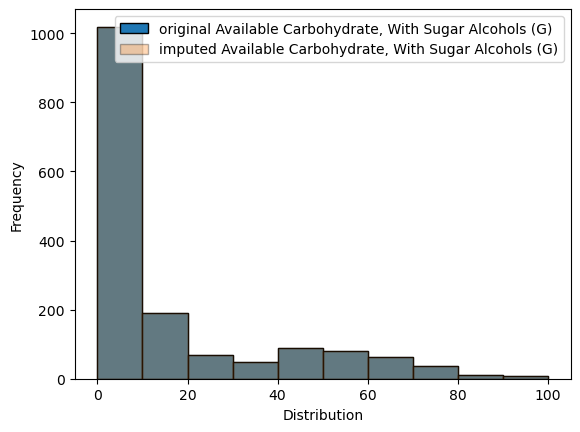

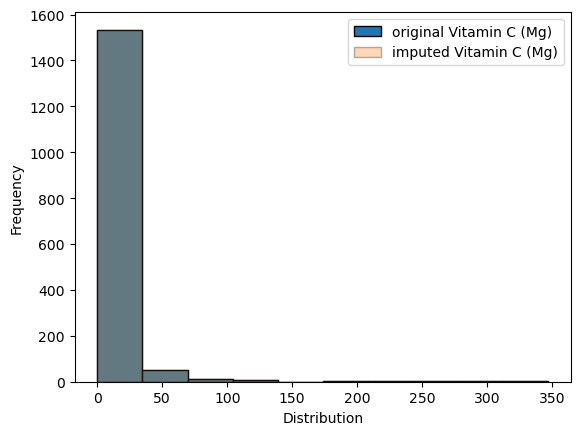

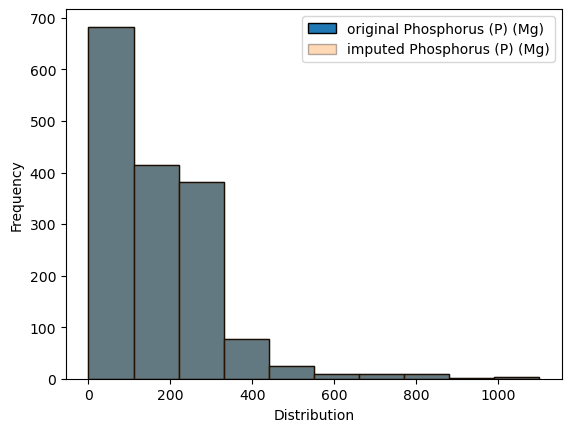

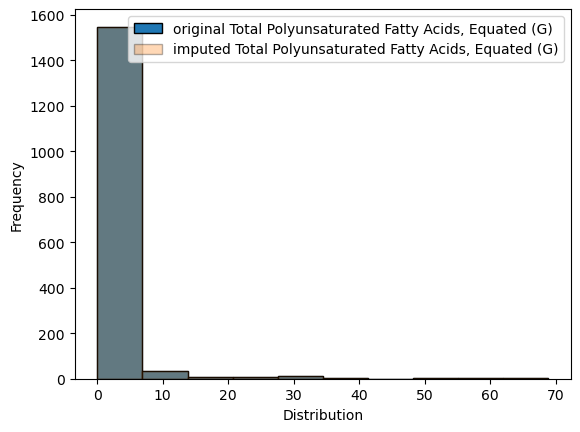

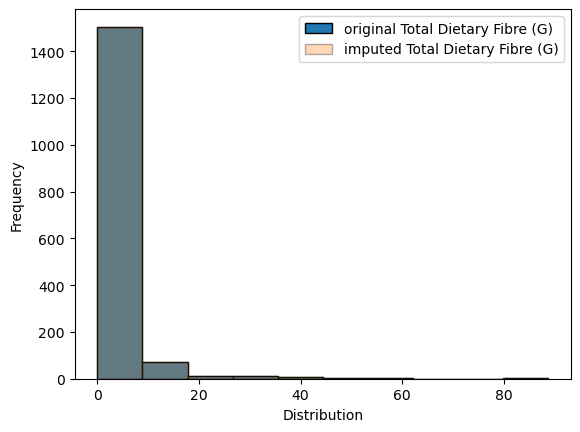

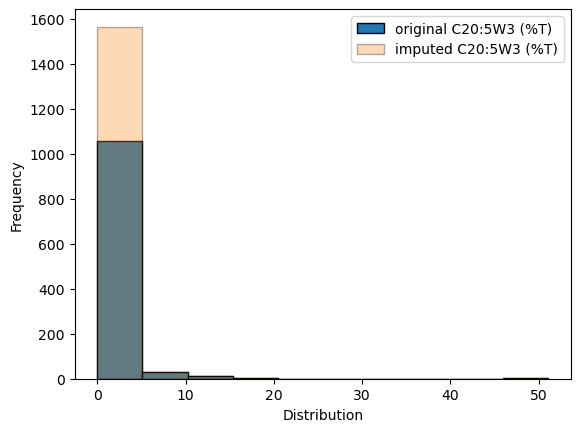

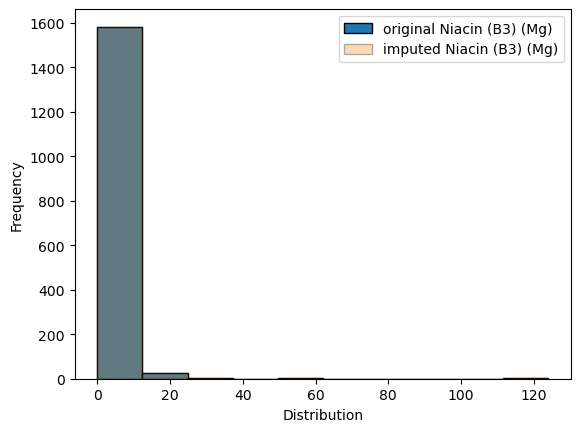

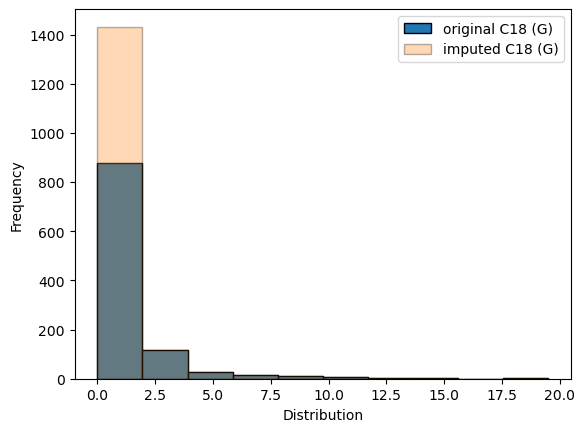

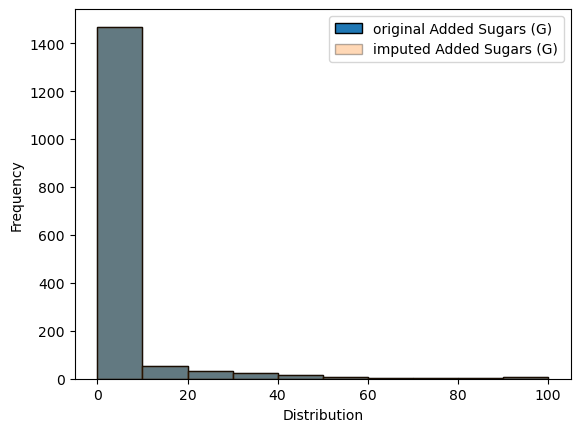

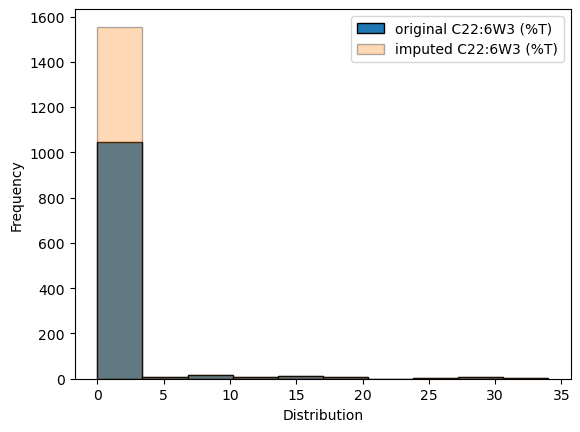

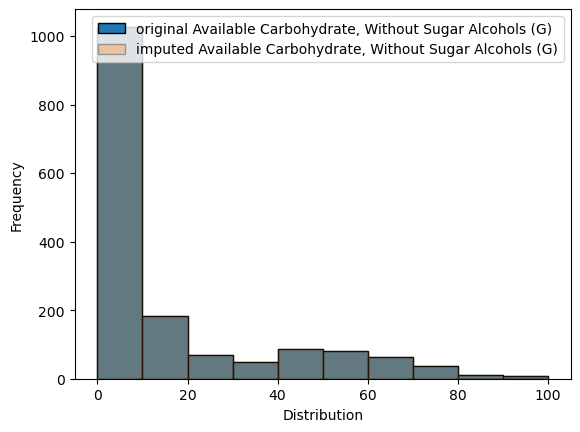

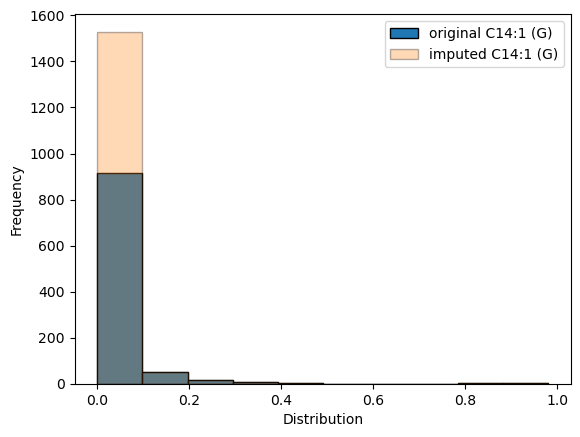

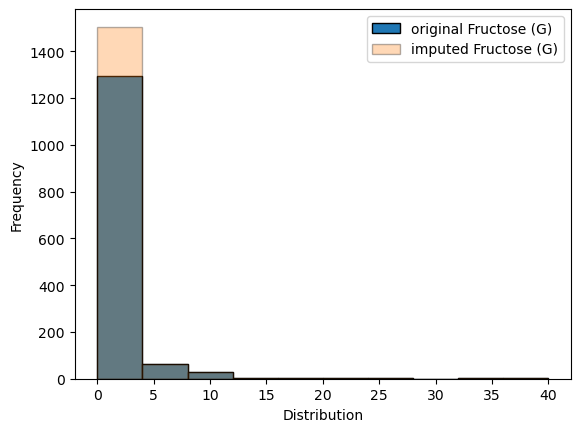

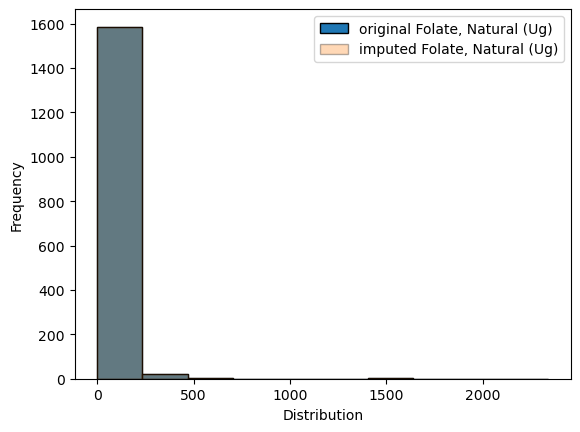

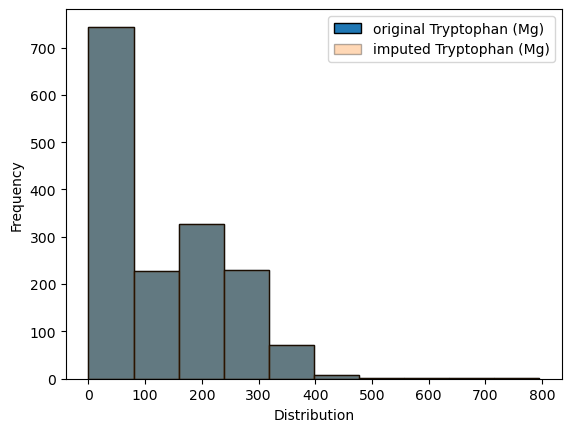

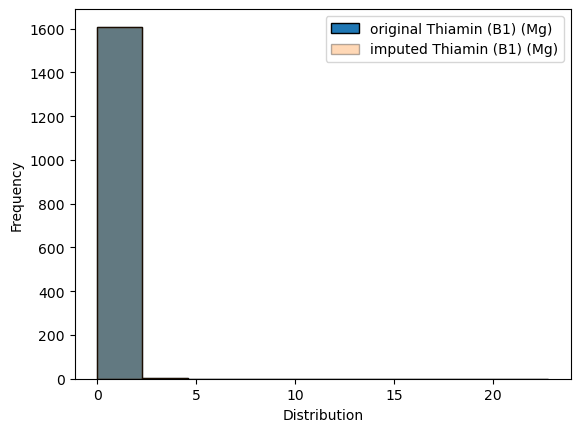

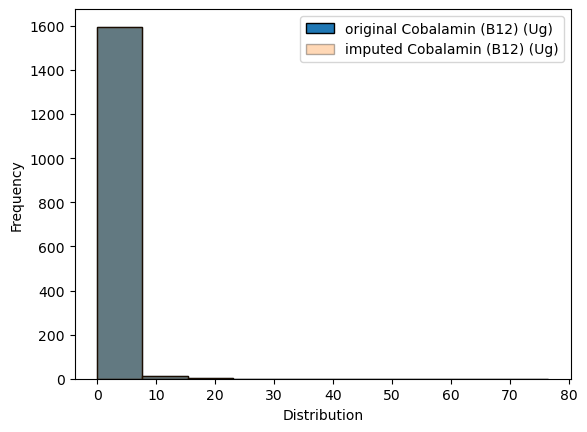

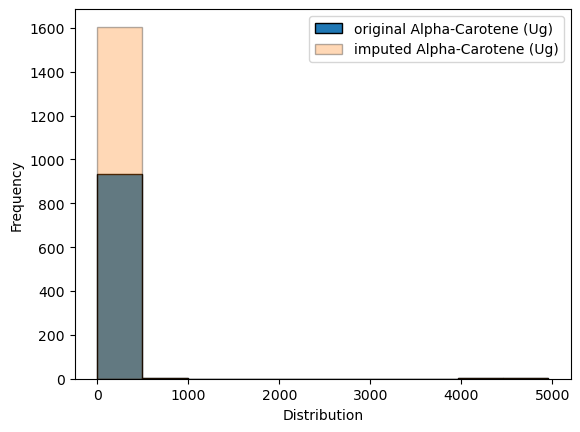

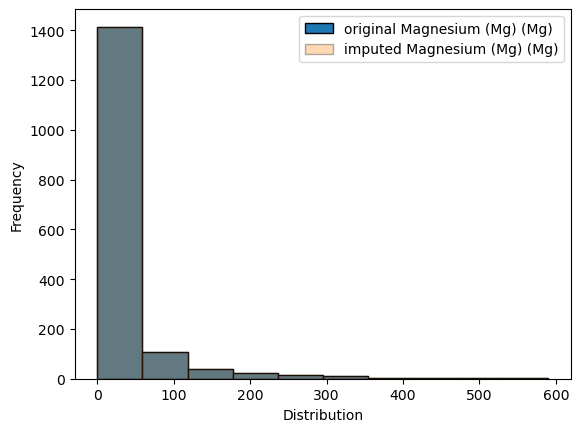

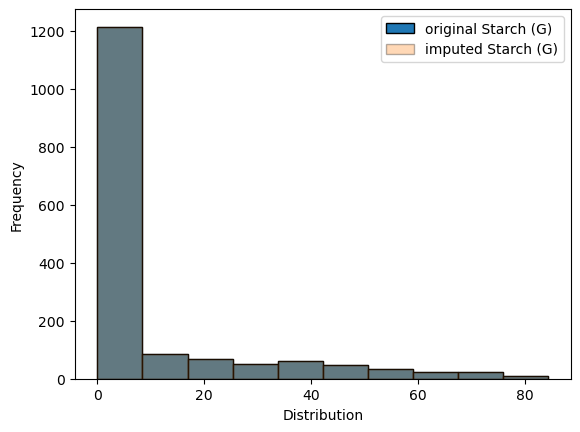

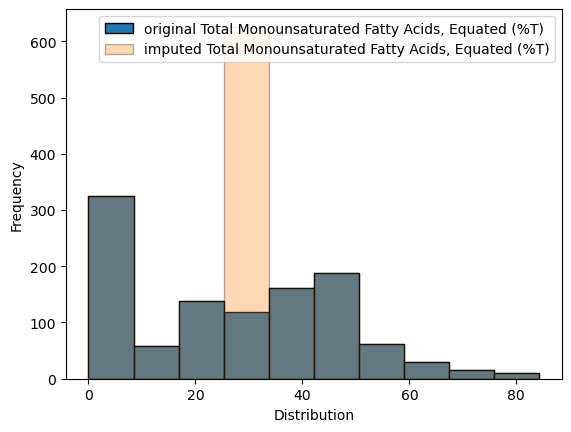

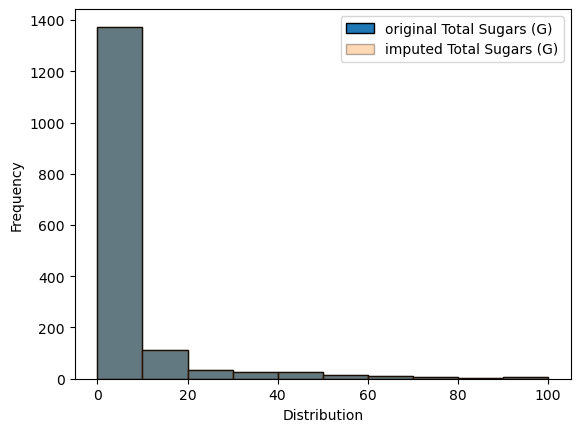

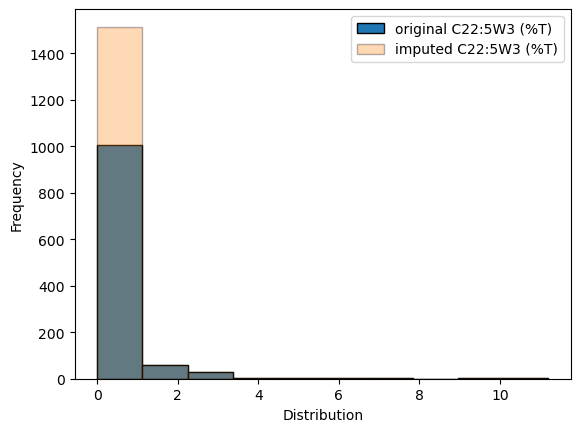

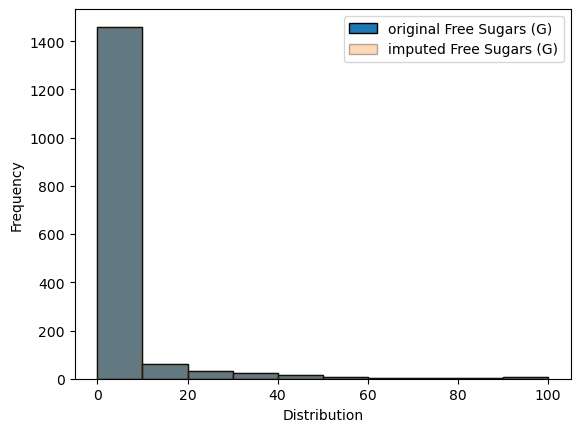

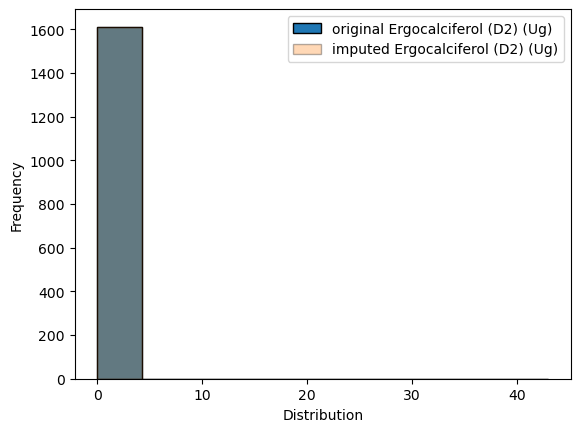

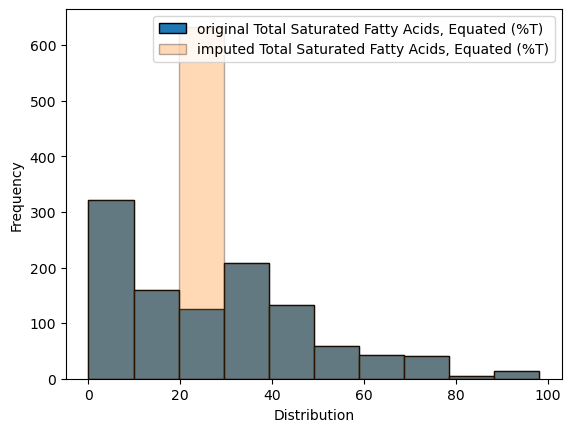

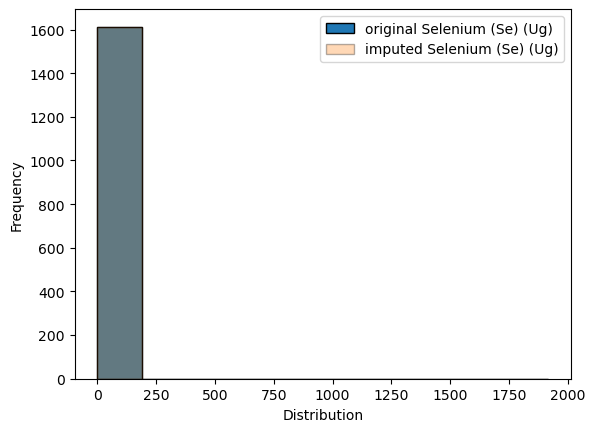

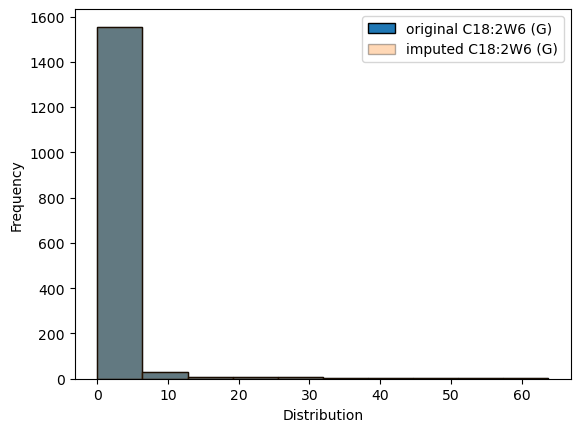

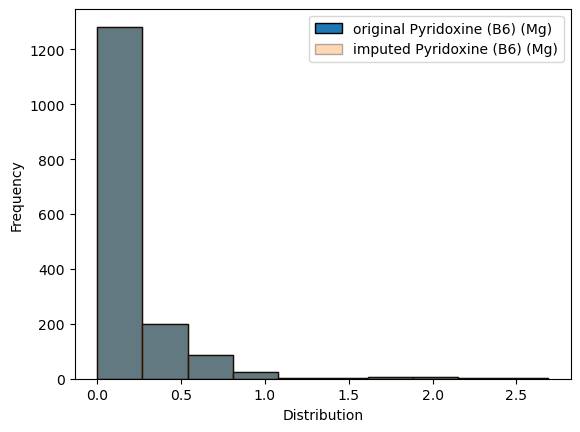

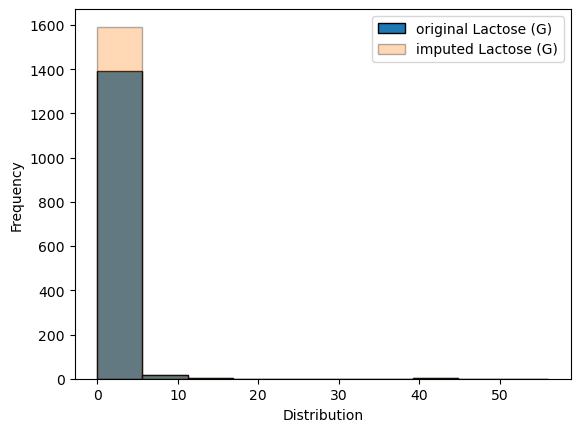

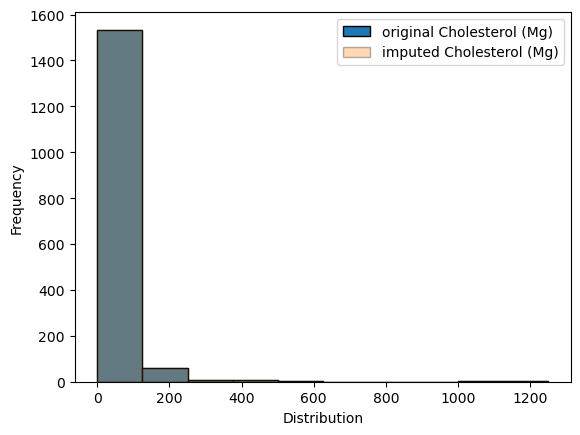

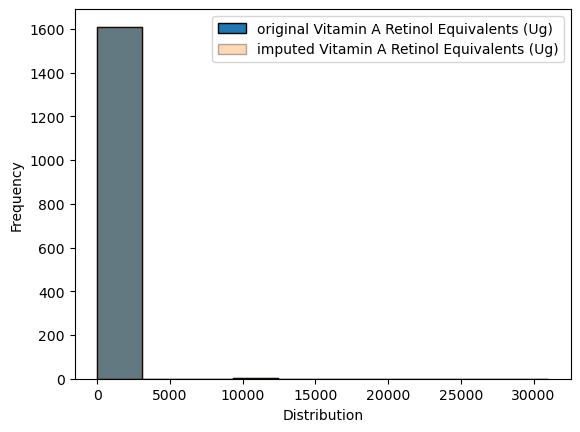

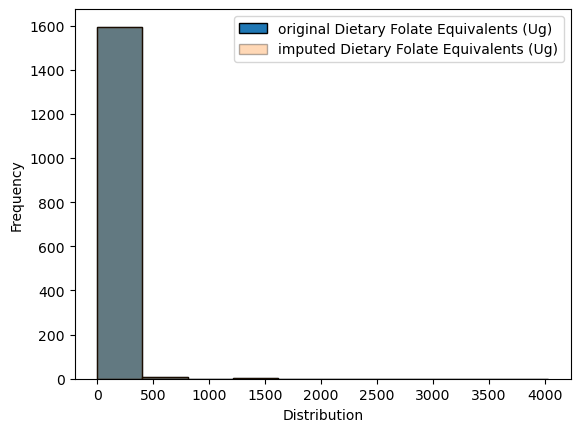

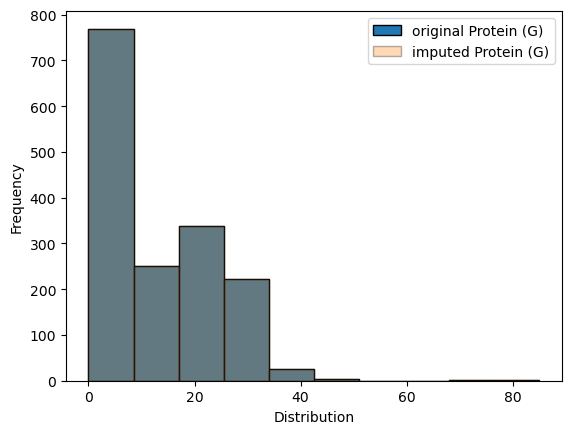

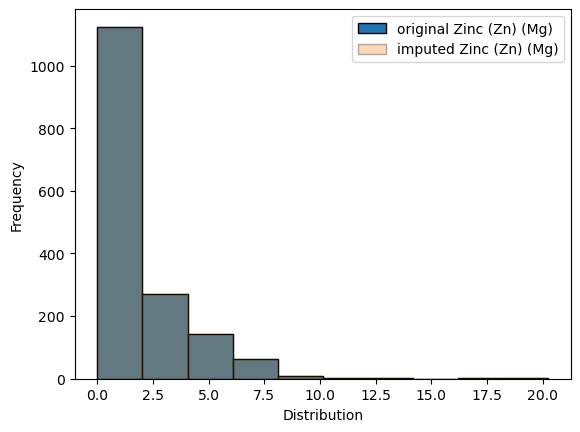

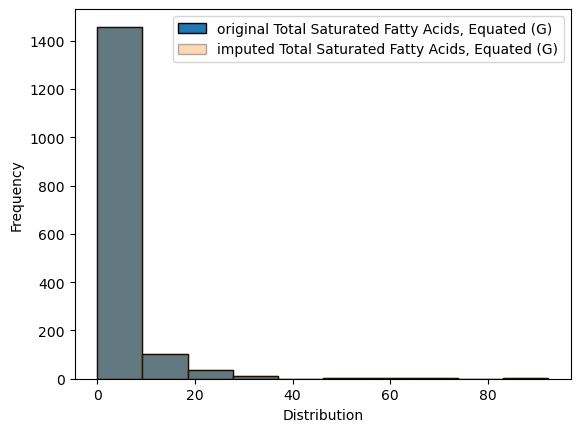

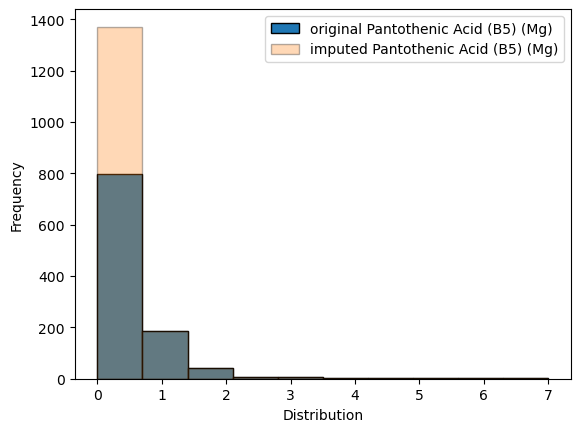

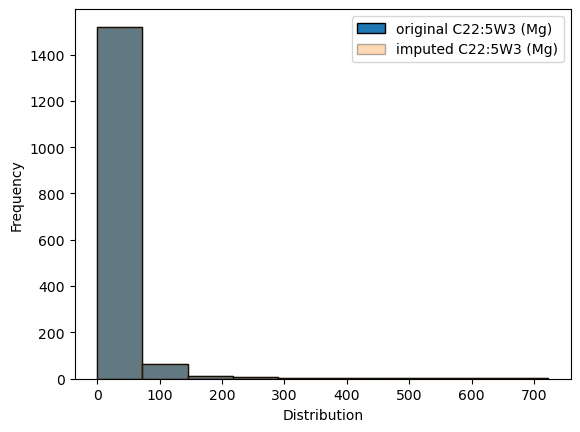

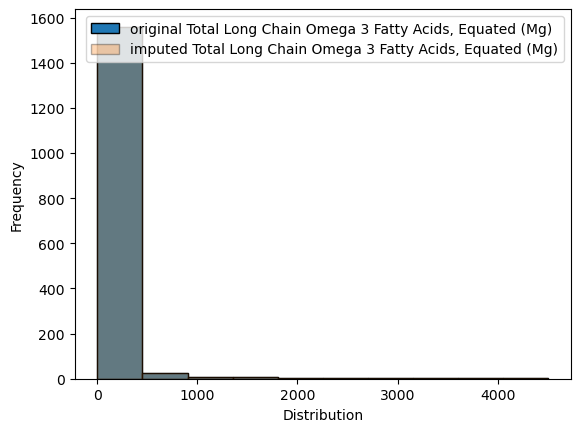

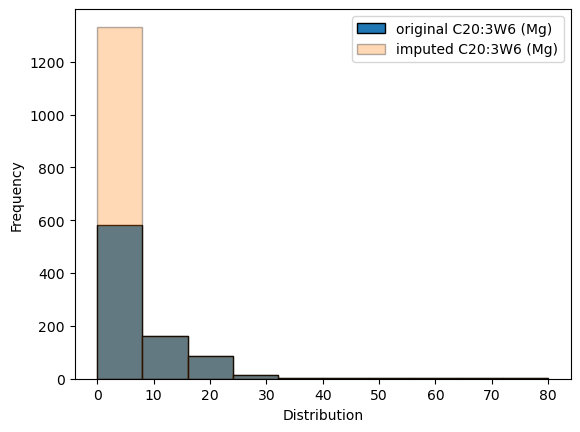

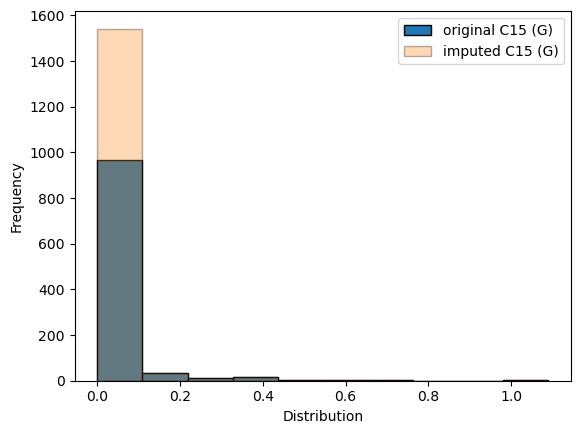

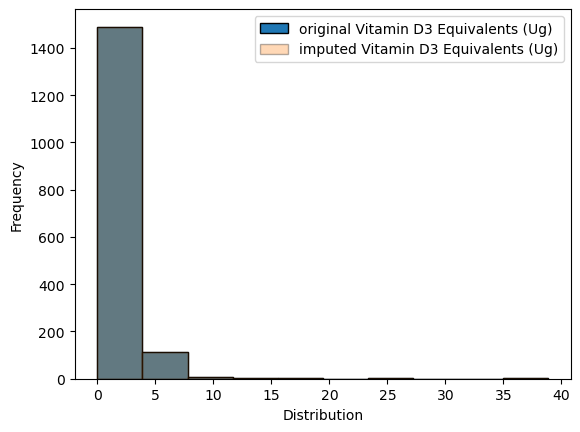

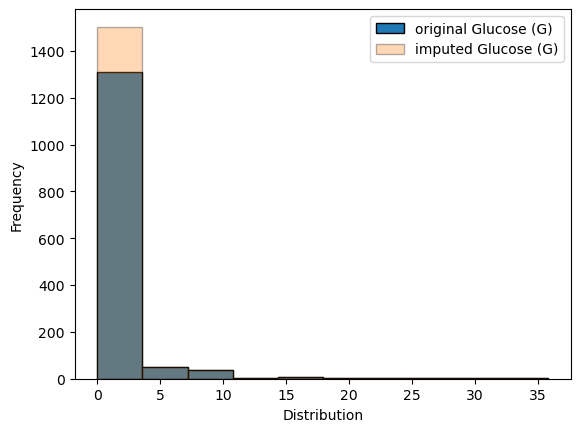

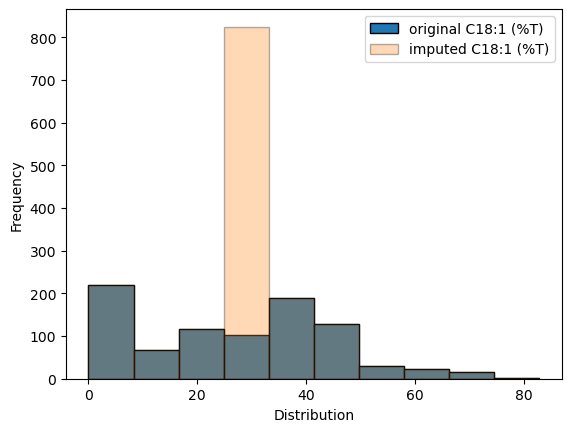

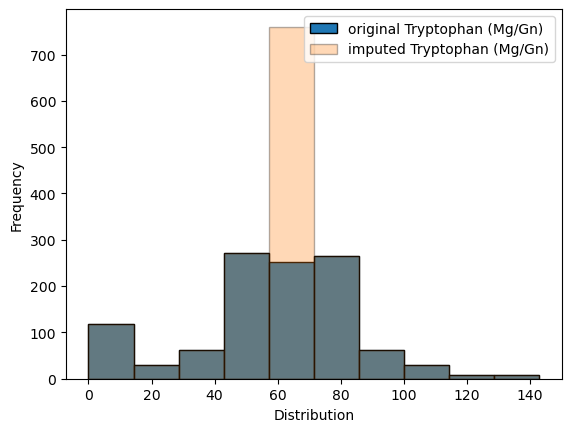

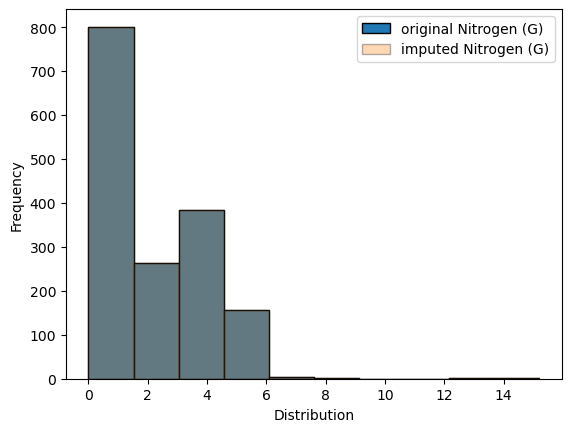

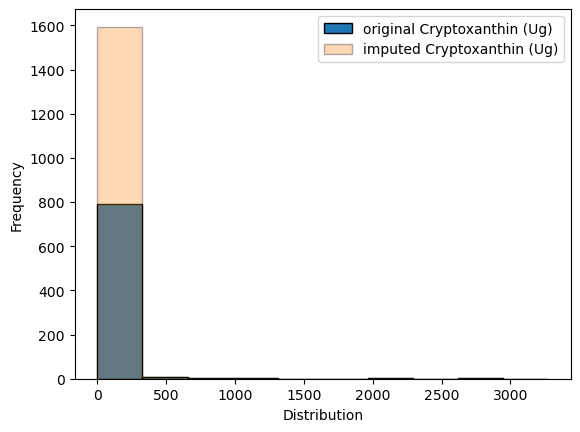

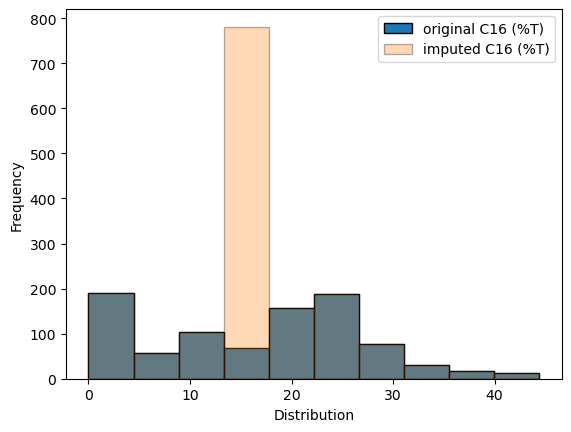

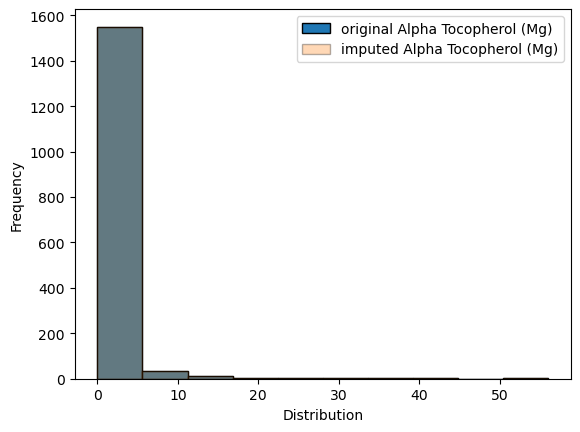

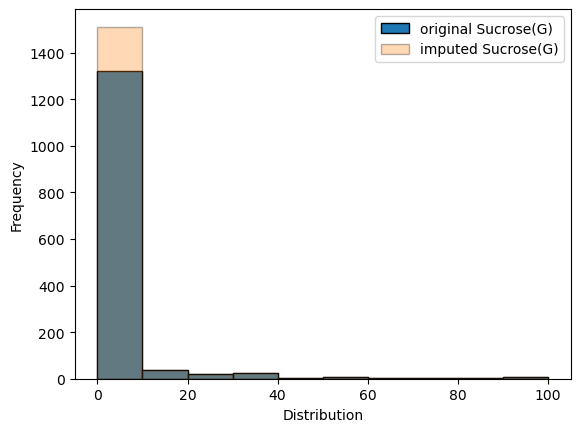

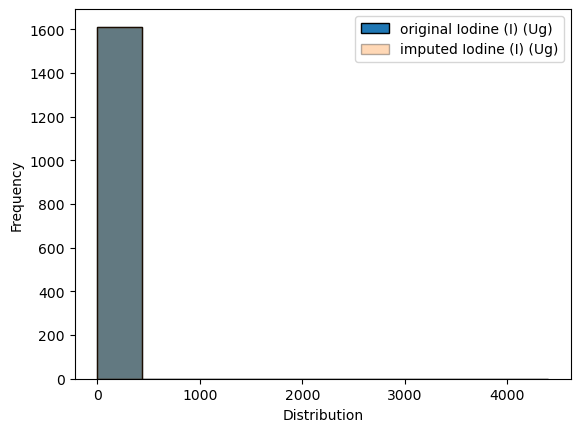

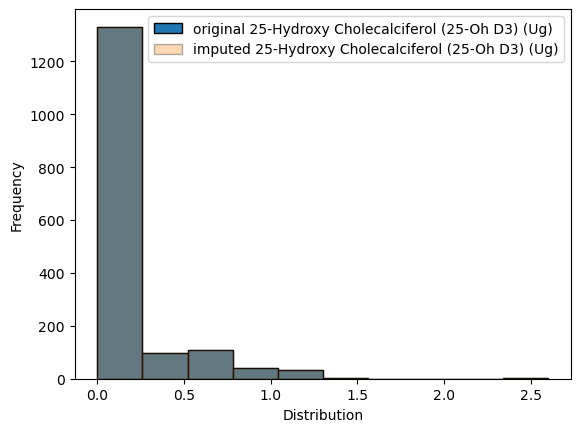

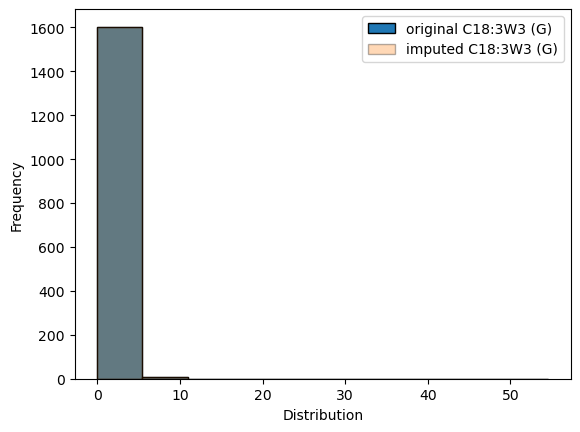

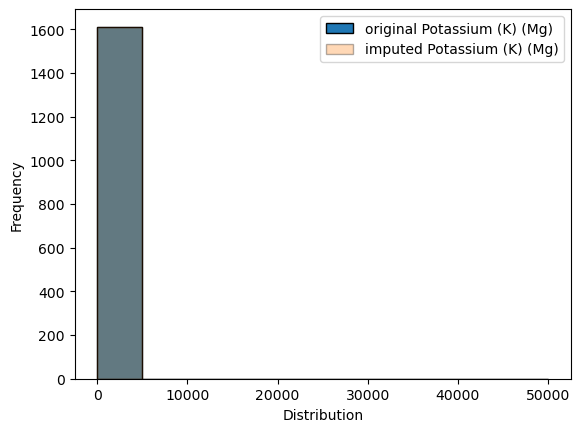

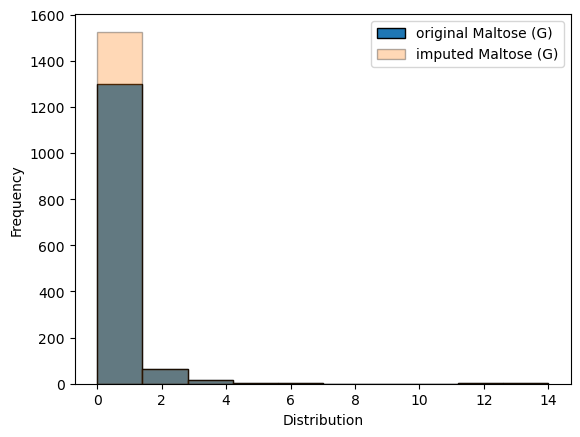

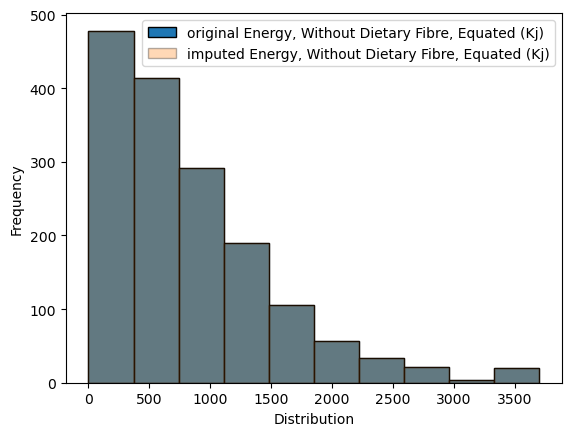

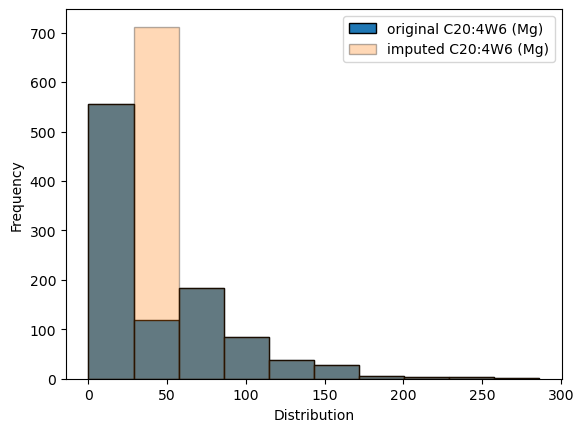

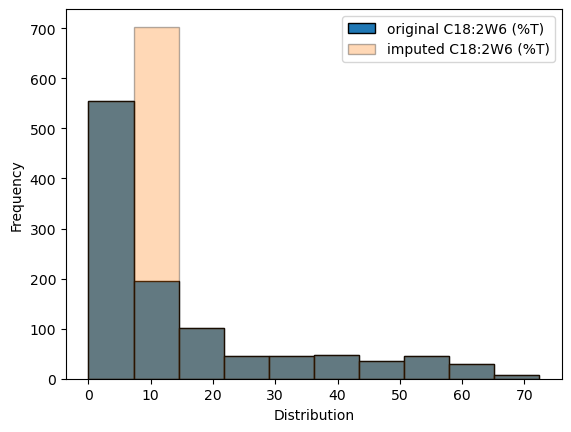

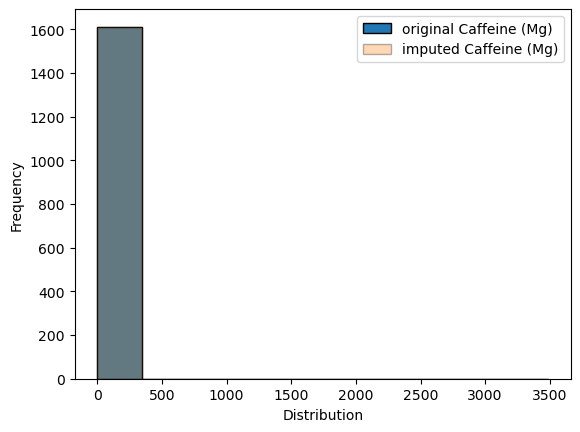

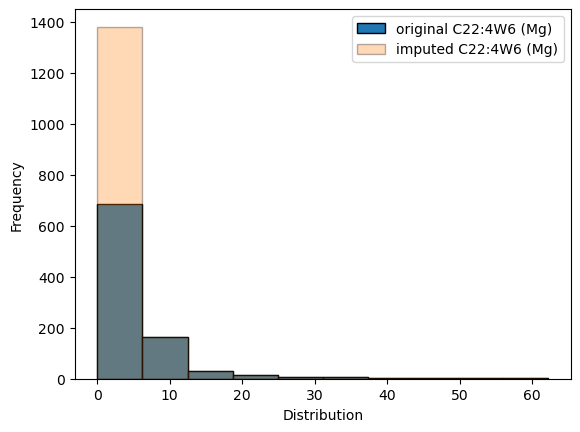

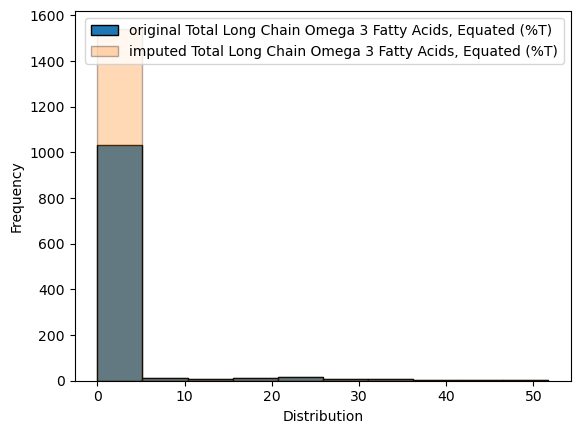

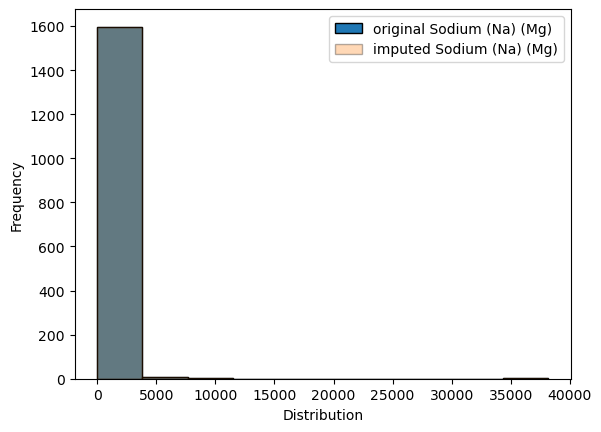

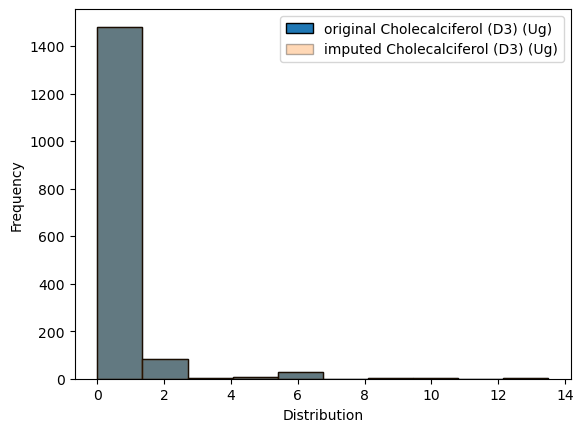

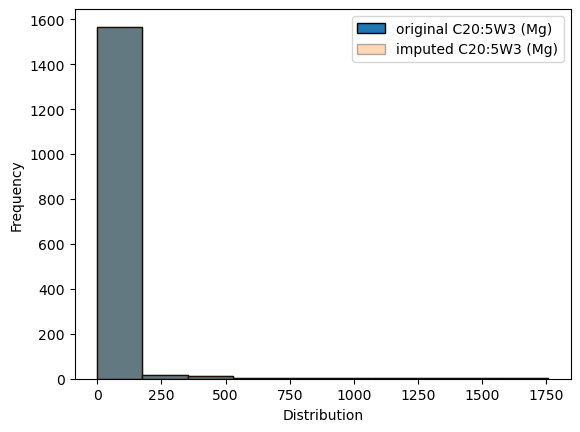

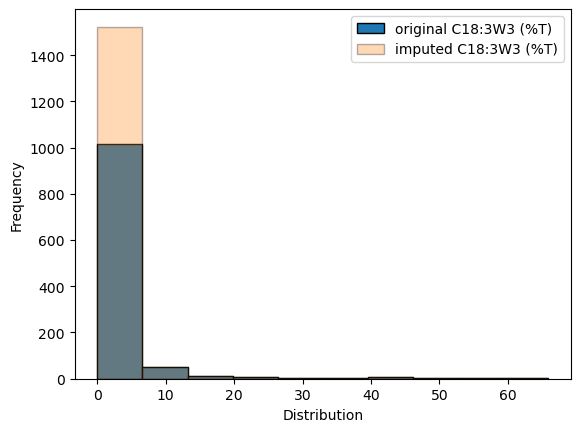

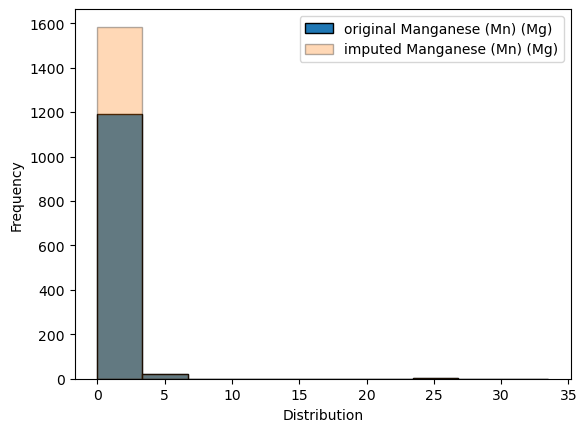

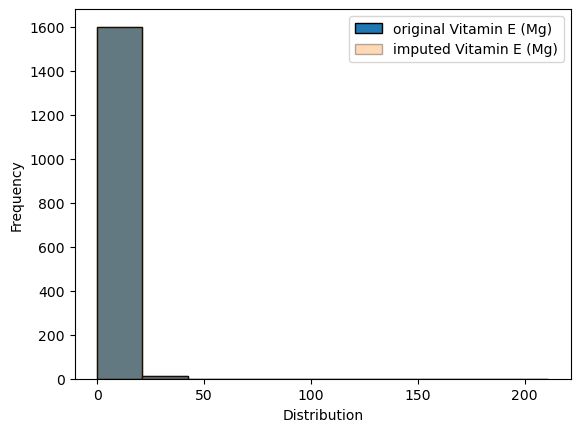

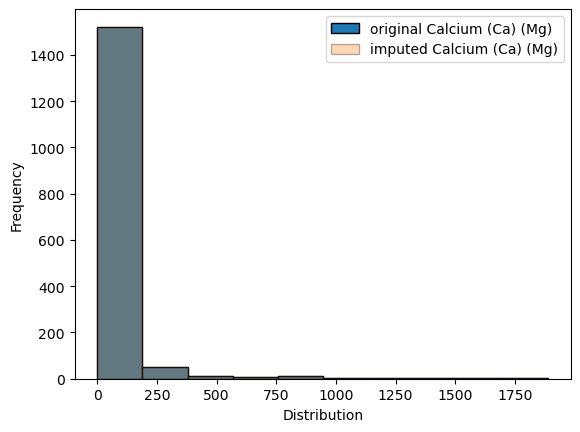

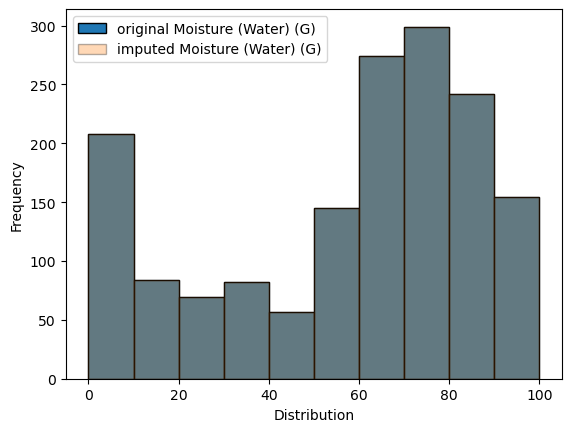

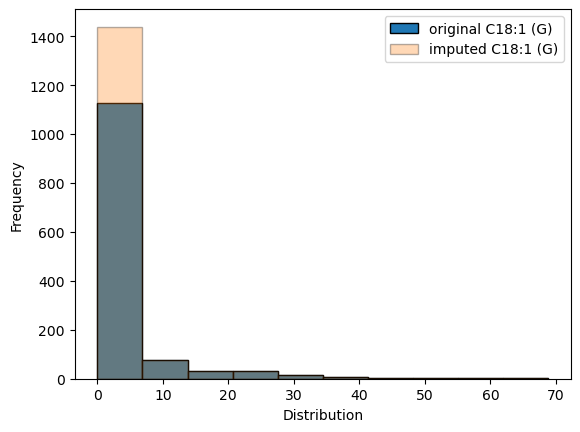

In [103]:
import matplotlib.pyplot as plt

for i in list(set(sl_df.columns) - set(["Public Food Key", "Classification", "Food Name"])):
    plt.hist(sl_df[i], bins = 10, edgecolor = "black", label = f"original {i}")
    plt.hist(sl_df[i].fillna(sl_df[i].mean()), bins = 10, alpha = 0.3, edgecolor = "black", label = f"imputed {i}")
    plt.xlabel("Distribution")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

In [104]:
for i in sl_df.columns:
    try:
        value = sl_df[i].mean()
    except Exception as e:
        value = sl_df[i].mode()
    sl_df[i].fillna(value, inplace = True)

In [105]:
for i in l_df.columns:
    try:
        value = l_df[i].mean()
    except Exception as e:
        value = l_df[i].mode()
    l_df[i].fillna(value, inplace = True)

# DataFrames for pca

In [106]:
pca_sl_df = sl_df.copy()
pca_l_df = l_df.copy()

### Normalizing the Data

In [107]:
sl_df["Classification"] = sl_df["Classification"].astype("int")

dont_standardize = set(["Public Food Key", "Classification", "Food Name"])
standardize_columns = list(set(sl_df.columns) - dont_standardize)

scaler = MinMaxScaler()
sl_df[standardize_columns] = scaler.fit_transform(sl_df[standardize_columns])

In [108]:
l_df["Classification"] = l_df["Classification"].astype("int")

dont_standardize = set(["Public Food Key", "Classification", "Food Name"])
standardize_columns = list(set(l_df.columns) - dont_standardize)

scaler = MinMaxScaler()
l_df[standardize_columns] = scaler.fit_transform(l_df[standardize_columns])

# ML Operations

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score

In [111]:
import warnings
warnings.filterwarnings("ignore")

In [112]:
string_columns = ["Public Food Key", "Classification", "Food Name"]
common_columns = list(set(sl_df.columns).intersection(set(l_df.columns)))
sl_df = sl_df[list(set(string_columns + common_columns))]
l_df = l_df[list(set(string_columns + common_columns))]

In [117]:
total_df = pd.concat([sl_df, l_df], axis = 0)
total_df.drop_duplicates(inplace = True)
total_df = total_df.transpose().drop_duplicates().transpose()
total_df.drop(columns = string_columns, inplace = True)
total_df.dropna(inplace = True)
total_df = total_df.reset_index(drop = True)
total_df.head()

Dietary Folate Equivalents (Ug) 25-Hydroxy Ergocalciferol (25-Oh D2) (Ug)  \
0                        0.000744                                       0.0   
1                        0.006946                                       0.0   
2                        0.001488                                       0.0   
3                        0.006202                                       0.0   
4                             0.0                                       0.0   

  Protein (G) Alcohol (G) Folic Acid (Ug) C22:6W3 (Mg) Zinc (Zn) (Mg)  \
0    0.127059         0.0             0.0          0.0       0.368889   
1    0.157647         0.0             0.0          0.0       0.212346   
2    0.047059         0.0             0.0          0.0        0.09037   
3    0.070588         0.0             0.0          0.0       0.114568   
4    0.145882         0.0             0.0          0.0       0.232099   

  Niacin Derived From Tryptophan (Mg)  \
0                            0.195266   
1                            0.087278   
2                            0.061391   
3                            0.037722   
4                            0.224112   

  Total Saturated Fatty Acids, Equated (G) Pantothenic Acid (B5) (Mg)  \
0                                 0.023807                   0.072141   
1                                 0.022292                   0.072141   
2                                 0.006709                   0.072141   
3                                 0.059409                   0.072141   
4                                 0.011146                   0.072141   

    C16 (G) Total Long Chain Omega 3 Fatty Acids, Equated (Mg) C22:5W3 (Mg)  \
0  0.045775                                                0.0          0.0   
1  0.045775                                                0.0          0.0   
2  0.045775                                                0.0          0.0   
3  0.045775                                           0.059172     0.353436   
4  0.045775                                                0.0          0.0   

  Iron (Fe) (Mg) Energy With Dietary Fibre, Equated (Kj)  \
0       0.113026                                0.333783   
1       0.139968                                0.345666   
2       0.067314                                0.271132   
3       0.095712                                0.375101   
4       0.132039                                0.362949   

  Vitamin D3 Equivalents (Ug) Beta-Carotene Equivalents (Provitamin A) (Ug)  \
0                         0.0                                      0.000841   
1                         0.0                                      0.573351   
2                         0.0                                      0.004281   
3                         0.0                                       0.00172   
4                         0.0                                      0.004663   

  Riboflavin (B2) (Mg) Total Trans Fatty Acids, Imputed (Mg)  \
0             0.010636                                   0.0   
1             0.054935                                   0.0   
2             0.002396                                   0.0   
3             0.012857                                   0.0   
4             0.016948                                   0.0   

  Total Monounsaturated Fatty Acids, Equated (G)  \
0                                       0.034868   
1                                       0.033255   
2                                        0.00546   
3                                       0.023948   
4                                       0.175456   

  Retinol (Preformed Vitamin A) (Ug) Glucose (G)   Ash (G)  \
0                                0.0    0.030675  0.058116   
1                                0.0    0.030675  0.118236   
2                                0.0    0.030675  0.036072   
3                                0.0    0.030675  0.056112   
4                                0.0    0.030675   0.06012   

  Niacin Derived Equ

# PCA classification

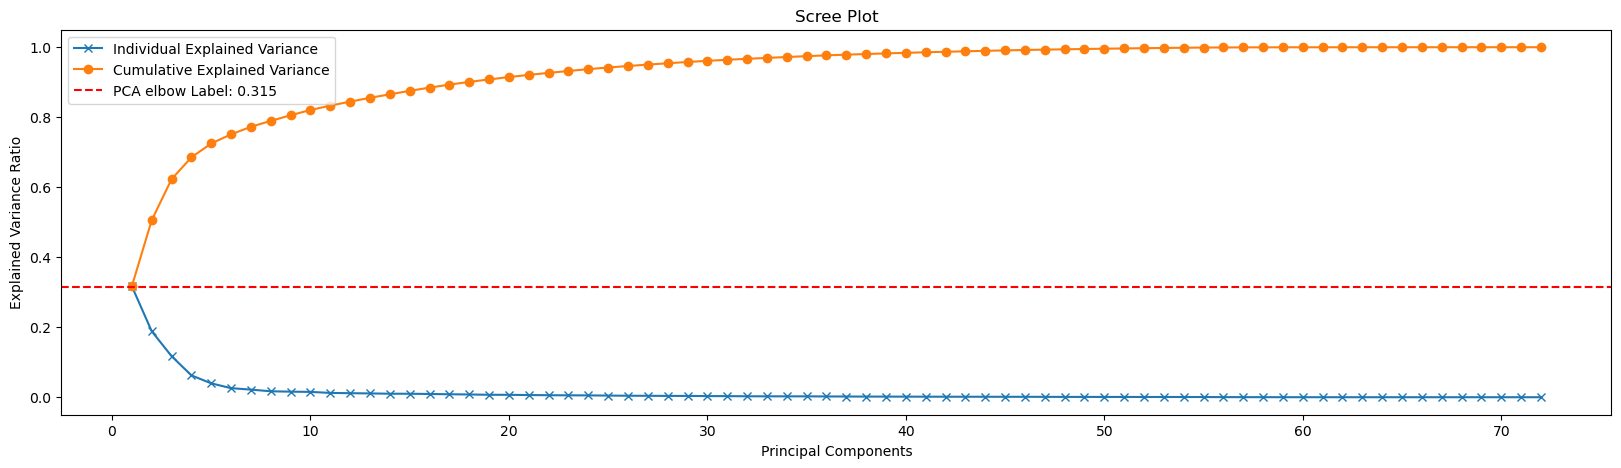

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

columns = [i for i in total_df.columns if i != "Type"]
X = total_df[columns].values

# Instantiate PCA
pca = PCA()

# Fit PCA on the data
pca.fit(X)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plot the scree plot
plt.figure(figsize = (20,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'x-', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'o-', label='Cumulative Explained Variance')
plt.axhline(y = 0.315, color = "red", linestyle = "--", label = "PCA elbow Label: 0.315")
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.show()


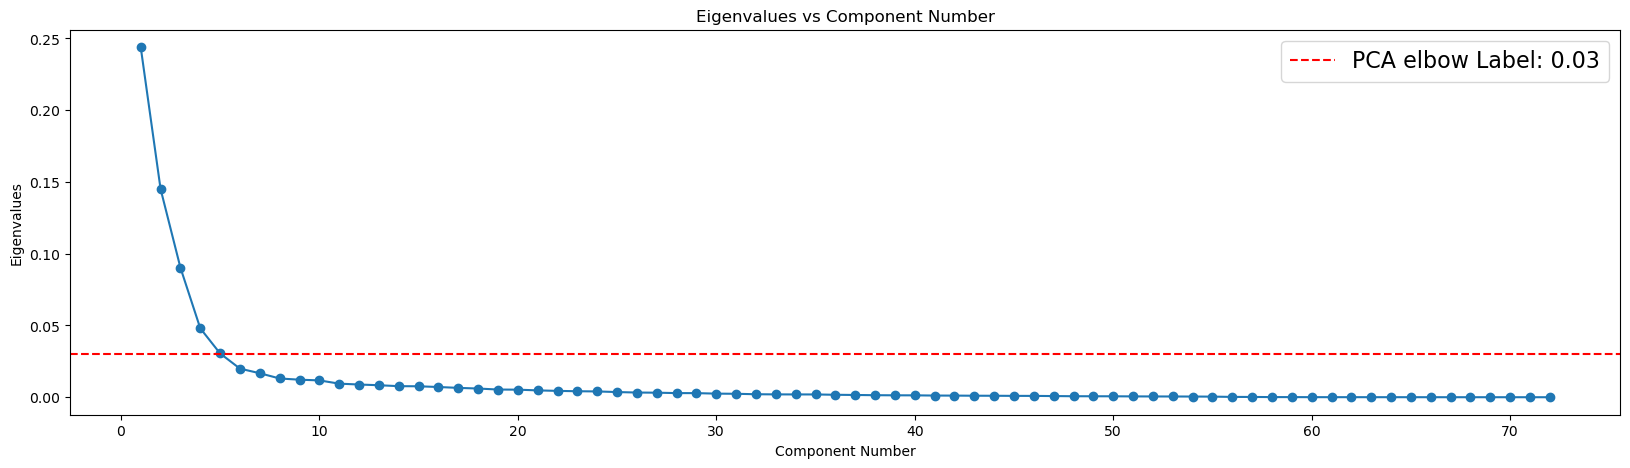

In [119]:
from sklearn.decomposition import PCA

columns = [i for i in total_df.columns if i != "Type"]
X = total_df[columns].values
pca = PCA()
pca.fit(X)

eigenvalues = pca.explained_variance_

plt.figure(figsize = (20,5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, "o-")
plt.axhline(y = 0.03, color = "red", linestyle = "--", label = "PCA elbow Label: 0.03")
plt.xlabel("Component Number")
plt.ylabel("Eigenvalues")
plt.title("Eigenvalues vs Component Number")
plt.legend(fontsize = 16)
plt.show()

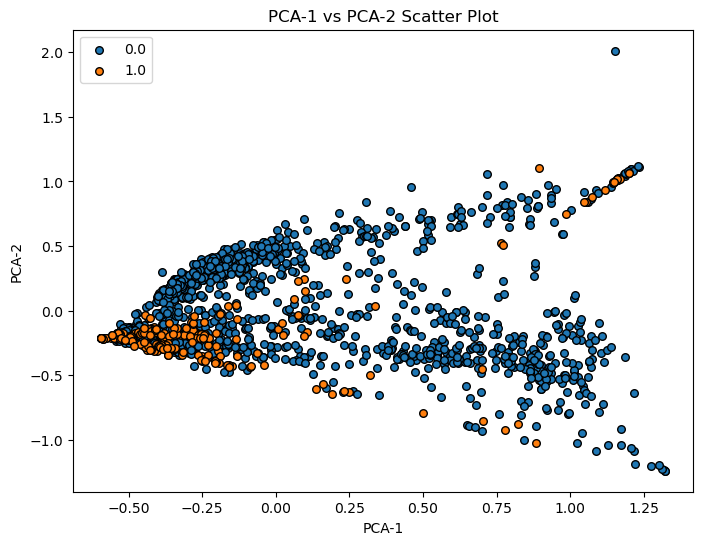

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = total_df.drop(["Type"], axis = 1).values

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(X_pca, columns = ['PCA-1', 'PCA-2'])
labels = total_df["Type"]

# Plot the scatter plot
plt.figure(figsize=(8, 6))
for label in labels.unique():
    label_indices = labels == label
    plt.scatter(pca_df.loc[label_indices, 'PCA-1'], pca_df.loc[label_indices, 'PCA-2'], label = label,
               s = 30, edgecolors = "black")
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA-1 vs PCA-2 Scatter Plot')
plt.legend()
plt.show()


# Linear Classification

In [150]:
from sklearn.metrics import confusion_matrix, f1_score
features = total_df.drop(["Type"], axis = 1)
labels = list(total_df["Type"])

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.15, random_state = 42)
lr_model = LogisticRegression(class_weight = 'balanced')
lr_model.fit(x_train, list(y_train))

predictions = lr_model.predict(x_test)
accuracy = accuracy_score(list(y_test), predictions)
f1 = f1_score(list(y_test), predictions)
print("Accuracy using train_test_split:", accuracy)
print("F1 using train_test_split:", f1)

Accuracy using train_test_split: 0.8118081180811808
F1 using train_test_split: 0.578512396694215


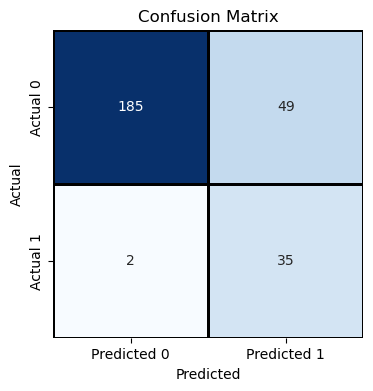

In [151]:
cm = confusion_matrix(list(y_test), predictions)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, linecolor = "black", linewidths = 2,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [152]:
cv = StratifiedKFold(n_splits = 2)
cv_scores = cross_val_score(lr_model, x_test, list(y_test), cv = cv, scoring = "accuracy")
mean_accuracy = cv_scores.mean()
print("Mean Accuracy using cross-validation:", mean_accuracy)

Mean Accuracy using cross-validation: 0.7601851851851852


### Linear Regression

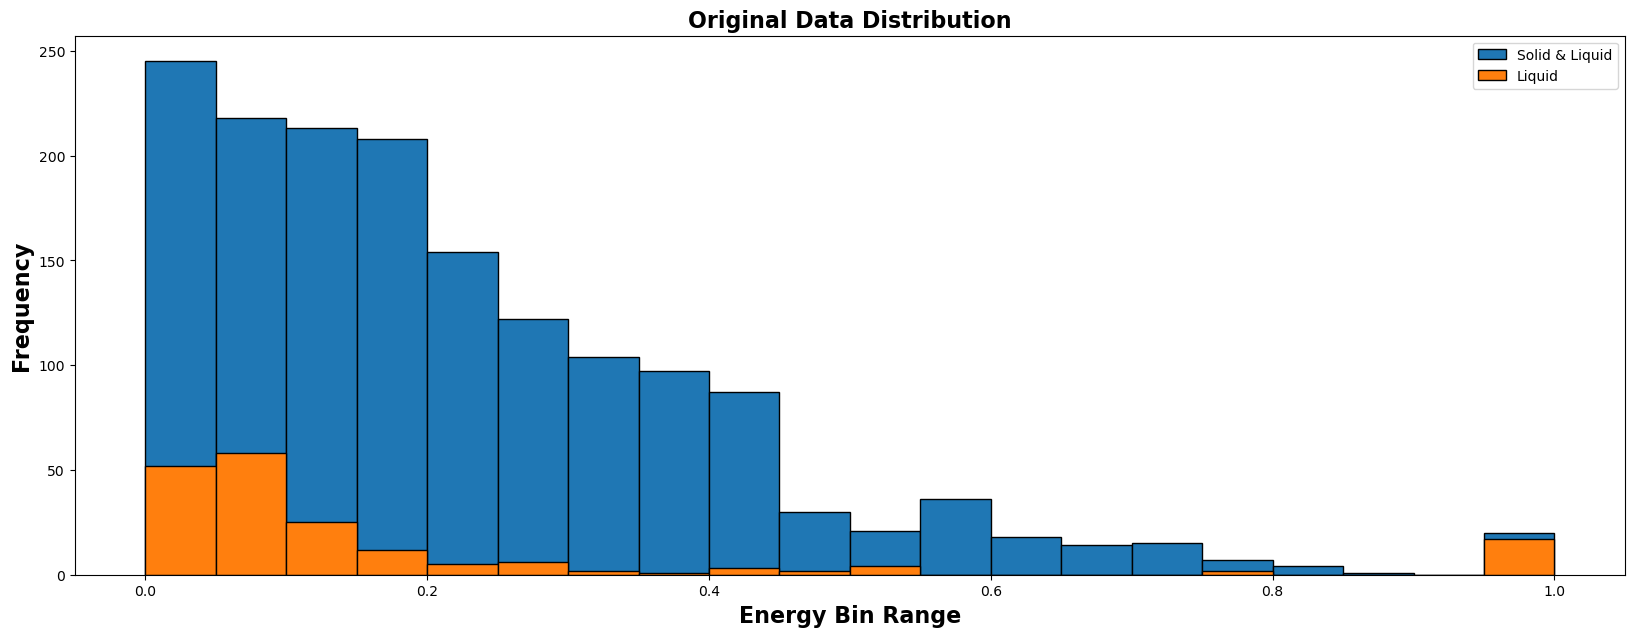

In [34]:
plt.figure(figsize=(20, 7))
plt.hist(sl_df["Energy With Dietary Fibre, Equated (Kj)"], edgecolor = "#000000", bins = 20, label = "Solid & Liquid")
plt.hist(l_df["Energy With Dietary Fibre, Equated (Kj)"], edgecolor = "#000000", bins = 20, label = "Liquid")

plt.title("Original Data Distribution", fontweight = "bold", fontsize = 16)
plt.xlabel("Energy Bin Range", fontweight = "bold", fontsize = 16)
plt.ylabel("Frequency", fontweight = "bold", fontsize = 16)
plt.legend()
plt.show()

In [35]:
def validation(original, predicted):
    mse = mean_squared_error(original, predicted)
    rmse = np.sqrt(mean_squared_error(original, predicted))
    r2 = r2_score(original, predicted)
    
    return mse, rmse, r2, predicted

In [36]:
lr_df = pd.DataFrame(columns = ["Selected Features", "alpha", "MSE", "RMSE", "R2", "Features"])
X = sl_df.drop(["Energy With Dietary Fibre, Equated (Kj)"] + string_columns, axis = 1)
y = sl_df["Energy With Dietary Fibre, Equated (Kj)"]

for i in range(1, len(X.columns)):
    selector = SelectKBest(f_classif, k = i)
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support(indices = True)]
    
    lr = LinearRegression()
    lr.fit(sl_df[selected_features], sl_df["Energy With Dietary Fibre, Equated (Kj)"])
    lr_predicted = lr.predict(l_df[selected_features])
    
    mse, rmse, r2, predicted = validation(l_df["Energy With Dietary Fibre, Equated (Kj)"], lr_predicted)
    lr_df = lr_df.append({"Selected Features":i, "alpha":0, "MSE":mse, "RMSE":rmse, "R2":r2, "Features":predicted}, ignore_index = True)
lr_df = lr_df.sort_values(by = ["R2", "MSE"], ascending = [False, True])
lr_df.head(1)

Selected Features alpha       MSE      RMSE        R2  \
3                 4     0  0.000035  0.005956  0.999554   

                                            Features  
3  [0.07338040517214808, 0.055352832963127256, 0....

In [37]:
ridge_df = pd.DataFrame(columns = ["Selected Features", "alpha", "MSE", "RMSE", "R2", "Features"])
X = sl_df.drop(["Energy With Dietary Fibre, Equated (Kj)"] + string_columns, axis = 1)
y = sl_df["Energy With Dietary Fibre, Equated (Kj)"]

for i in range(1, len(X.columns)):
    for j in np.arange(0.0, 1.1, 0.1):
        selector = SelectKBest(f_classif, k = i)
        X_new = selector.fit_transform(X, y)
        selected_features = X.columns[selector.get_support(indices = True)]
    
        ridge_model = Ridge(alpha = round(j, 1))
        ridge_model.fit(sl_df[selected_features], sl_df["Energy With Dietary Fibre, Equated (Kj)"])
        ridge_predicted = ridge_model.predict(l_df[selected_features])
        
        mse, rmse, r2, predicted = validation(l_df["Energy With Dietary Fibre, Equated (Kj)"], ridge_predicted)
        ridge_df = ridge_df.append({"Selected Features":i, "alpha":round(j, 1), "MSE":mse, "RMSE":rmse, "R2":r2, "Features":predicted}, ignore_index = True)

ridge_df = ridge_df.sort_values(by = ["R2", "MSE"], ascending = [False, True])
ridge_df.head(1)

Selected Features  alpha       MSE      RMSE        R2  \
2                 1    0.2  0.000035  0.005926  0.999559   

                                            Features  
2  [0.07337955055514195, 0.05717703678149752, 0.0...

In [38]:
lasso_df = pd.DataFrame(columns = ["Selected Features", "alpha", "MSE", "RMSE", "R2", "Features"])
X = sl_df.drop(["Energy With Dietary Fibre, Equated (Kj)"] + string_columns, axis = 1)
y = sl_df["Energy With Dietary Fibre, Equated (Kj)"]

for i in range(1, len(X.columns)):
    for j in np.arange(0.0, 1.1, 0.1):
        selector = SelectKBest(f_classif, k = i)
        X_new = selector.fit_transform(X, y)
        selected_features = X.columns[selector.get_support(indices = True)]
        
        lasso_model = Lasso(alpha = round(j, 1))
        lasso_model.fit(sl_df[selected_features], sl_df["Energy With Dietary Fibre, Equated (Kj)"])
        lasso_predicted = lasso_model.predict(l_df[selected_features])
        
        mse, rmse, r2, predicted = validation(l_df["Energy With Dietary Fibre, Equated (Kj)"], lasso_predicted)
        lasso_df = lasso_df.append({"Selected Features":i, "alpha":round(j, 1), "MSE":mse, "RMSE":rmse, "R2":r2, "Features":predicted}, ignore_index = True)

lasso_df = lasso_df.sort_values(by = ["R2", "MSE"], ascending = [False, True])
lasso_df.head(1)

Selected Features  alpha       MSE      RMSE        R2  \
33                 4    0.0  0.000035  0.005956  0.999554   

                                             Features  
33  [0.07338040517214807, 0.0553528329631272, 0.04...

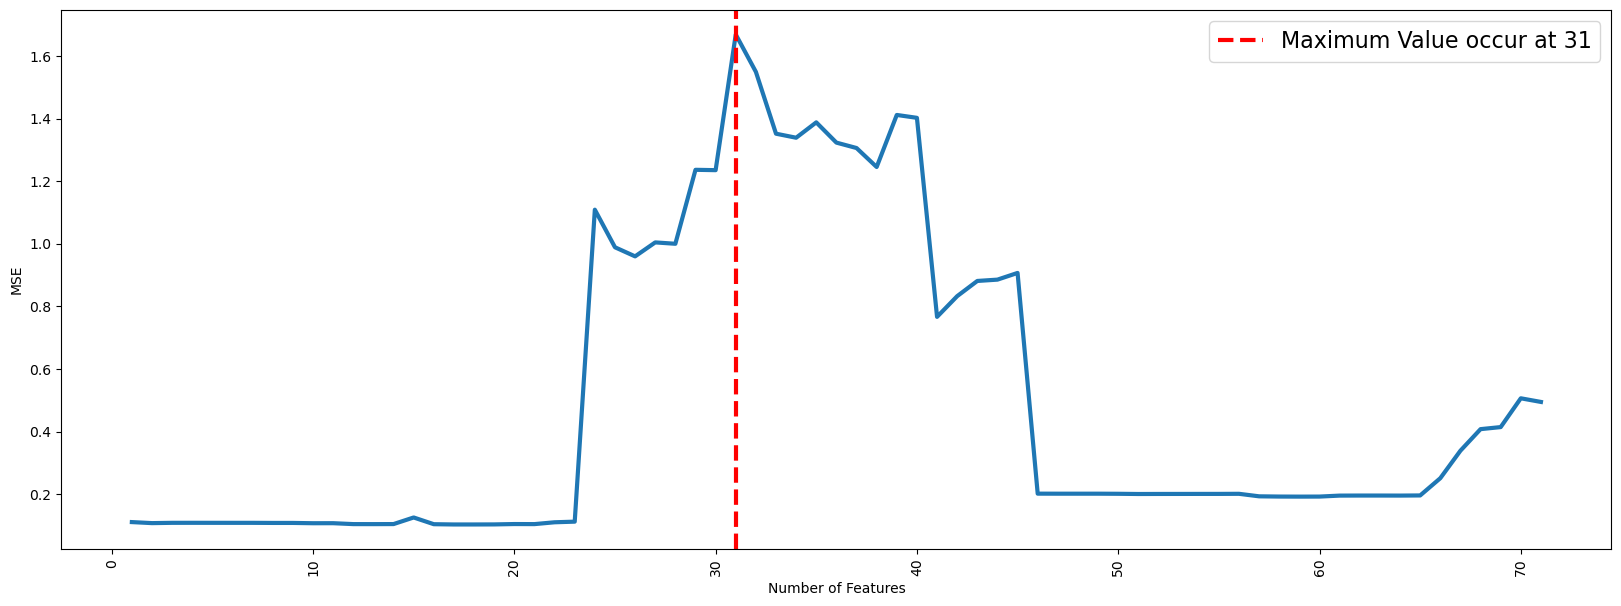

In [39]:
cod_df = pd.DataFrame(columns = ["Selected Features", "alpha", "MSE", "RMSE", "R2", "Features"])
X = sl_df.drop(["Total Dietary Fibre (G)"] + string_columns, axis = 1)
y = sl_df["Total Dietary Fibre (G)"]

for i in range(1, len(X.columns)):
    selector = SelectKBest(f_classif, k = i)
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support(indices = True)]
    
    lr = LinearRegression()
    lr.fit(sl_df[selected_features], y)
    lr_predicted = lr.predict(l_df[selected_features])
    
    mse, rmse, r2, predicted = validation(l_df["Energy With Dietary Fibre, Equated (Kj)"], lr_predicted)
    cod_df = cod_df.append({"Selected Features":i, "alpha":0, "MSE":mse, "RMSE":rmse, "R2":r2, "Features":predicted}, ignore_index = True)
cod_df = cod_df.sort_values("Selected Features")

plt.figure(figsize = (20,7))
plt.plot(cod_df["Selected Features"], cod_df["MSE"], linewidth = 3)
plt.axvline(x = 31, color = "red", linestyle = "--", label = "Maximum Value occur at 31", linewidth = 3)

plt.xlabel("Number of Features")
plt.xticks(rotation = 90)
plt.ylabel("MSE")
plt.legend(fontsize = 16)
plt.show()

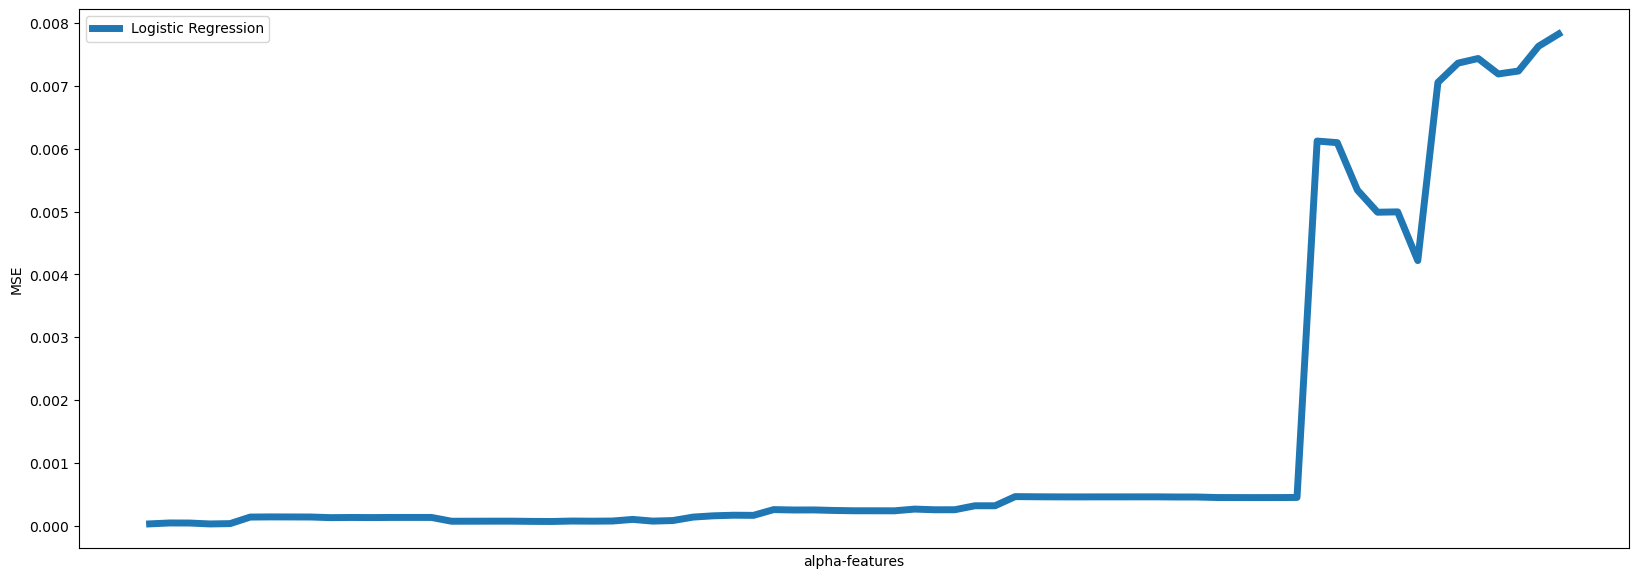

In [40]:
sorted_lr_df = lr_df.sort_values("Selected Features")
sorted_lr_df["alpha_features"] = sorted_lr_df["alpha"].astype(str) + "-" + sorted_lr_df["Selected Features"].astype(str)

plt.figure(figsize = (20,7))
plt.plot(sorted_lr_df["alpha_features"], sorted_lr_df["MSE"], linewidth = 5, label = "Logistic Regression")

plt.tick_params(axis = "x", which = "both", bottom = False, top = False, labelbottom = False)
plt.xlabel("alpha-features")
plt.xticks(rotation = 90)
plt.ylabel("MSE")
plt.legend()
plt.show()

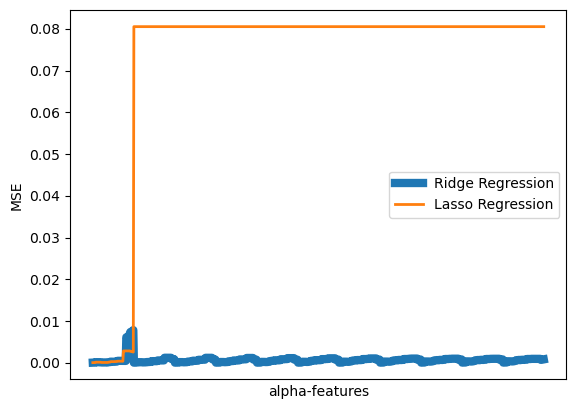

In [41]:
sorted_ridge_df = ridge_df.sort_values(["alpha", "Selected Features"])
sorted_ridge_df["alpha"] = sorted_ridge_df["alpha"].apply(lambda x: str(int(x)) if x.is_integer() else str(x))
sorted_ridge_df["alpha_features"] = sorted_ridge_df["alpha"].astype(str) + "-" + sorted_ridge_df["Selected Features"].astype(str)

sorted_lasso_df = lasso_df.sort_values(["alpha", "Selected Features"])
sorted_lasso_df["alpha"] = sorted_lasso_df["alpha"].apply(lambda x: str(int(x)) if x.is_integer() else str(x))
sorted_lasso_df["alpha_features"] = sorted_lasso_df["alpha"].astype(str) + "-" + sorted_lasso_df["Selected Features"].astype(str)

plt.plot(sorted_ridge_df["alpha_features"], sorted_ridge_df["MSE"], linewidth = 6, label = "Ridge Regression")
plt.plot(sorted_lasso_df["alpha_features"], sorted_lasso_df["MSE"],  linewidth = 2, label = "Lasso Regression")

plt.tick_params(axis = "x", which = "both", bottom = False, top = False, labelbottom = False)
plt.xlabel("alpha-features")
plt.xticks(rotation = 90)
plt.ylabel("MSE")
plt.legend()
plt.show()


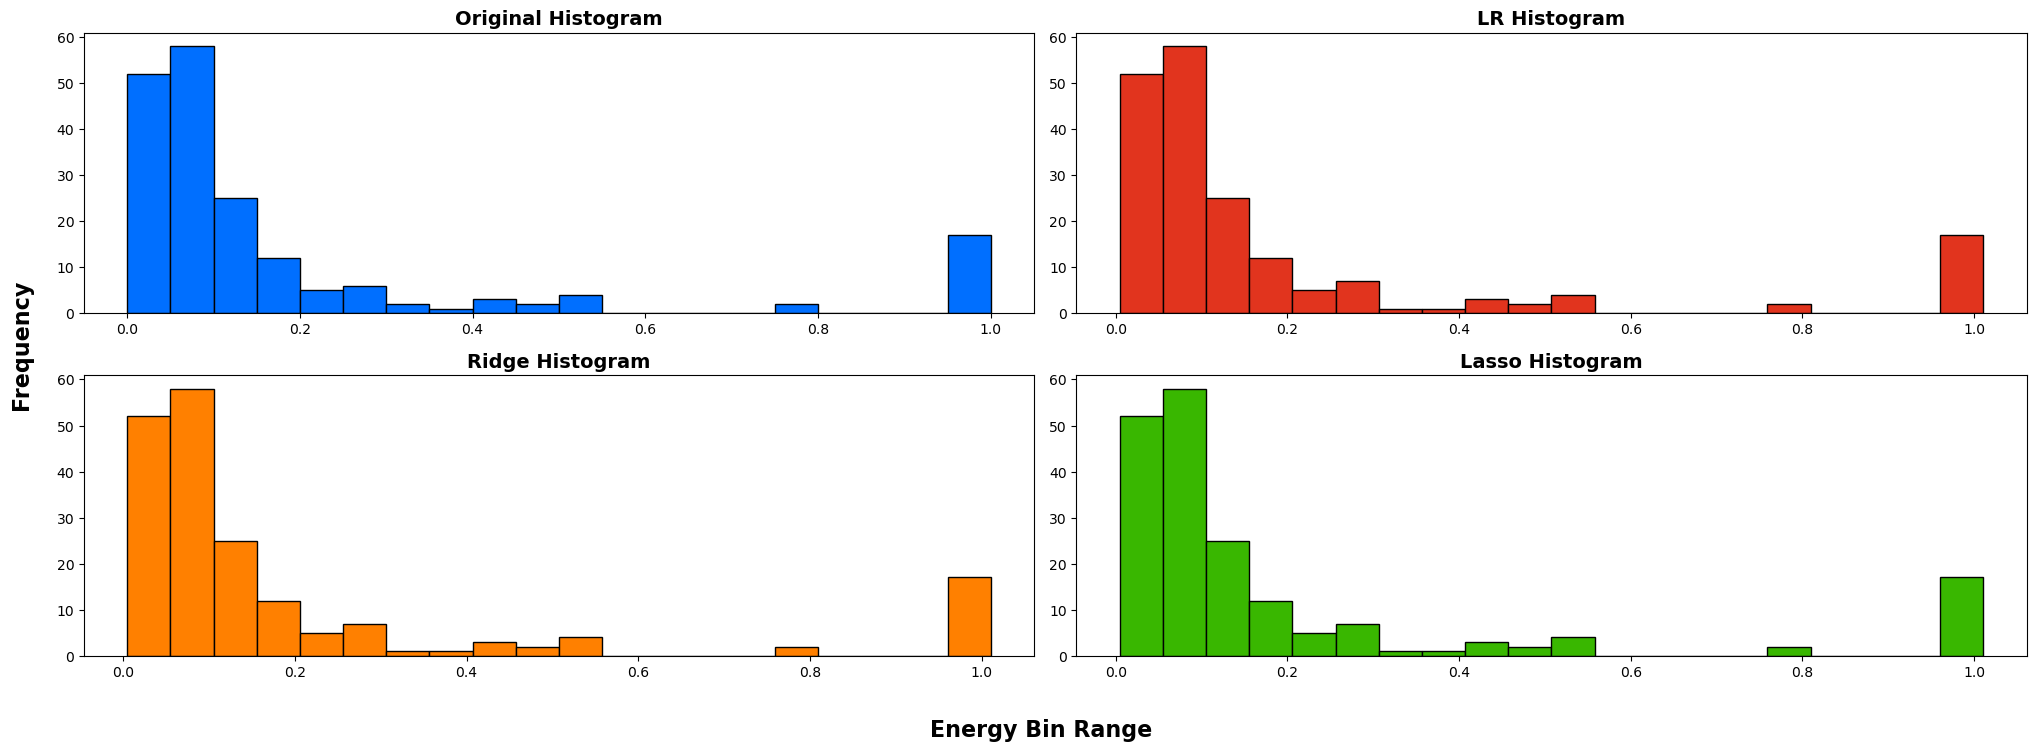

In [42]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 7))

axes[0, 0].hist(l_df["Energy With Dietary Fibre, Equated (Kj)"], edgecolor = "#000000", bins = 20, color = "#006FFF")
axes[0, 0].set_title("Original Histogram", fontweight = "bold", fontsize = 14)

axes[0, 1].hist(lr_df["Features"][0], edgecolor = "#000000", bins = 20, color = "#E1341E")
axes[0, 1].set_title("LR Histogram", fontweight = "bold", fontsize = 14)

axes[1, 0].hist(ridge_df["Features"][0], edgecolor = "#000000", bins = 20, color = "#FF8000")
axes[1, 0].set_title("Ridge Histogram", fontweight = "bold", fontsize = 14)

axes[1, 1].hist(lasso_df["Features"][0], edgecolor = "#000000", bins = 20, color = "#39B700")
axes[1, 1].set_title("Lasso Histogram", fontweight = "bold", fontsize = 14)

fig.text(0.5, -0.05, "Energy Bin Range", ha = "center", va = "center", fontweight = "bold", fontsize = 16)
fig.text(-0.01, 0.5, 'Frequency', ha = "center", va = "center", rotation='vertical', fontweight = "bold", fontsize = 16)

plt.tight_layout()
plt.show()

### KNN Regression

In [43]:
error_rate = []
for i in range(1, l_df.shape[0]):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(sl_df.drop(["Energy With Dietary Fibre, Equated (Kj)"] + string_columns, axis = 1), sl_df["Energy With Dietary Fibre, Equated (Kj)"])
    knn_predicted = knn.predict(l_df.drop(["Energy With Dietary Fibre, Equated (Kj)"] + string_columns, axis = 1))
    mse = mean_squared_error(l_df["Energy With Dietary Fibre, Equated (Kj)"], knn_predicted)
    error_rate.append(mse)

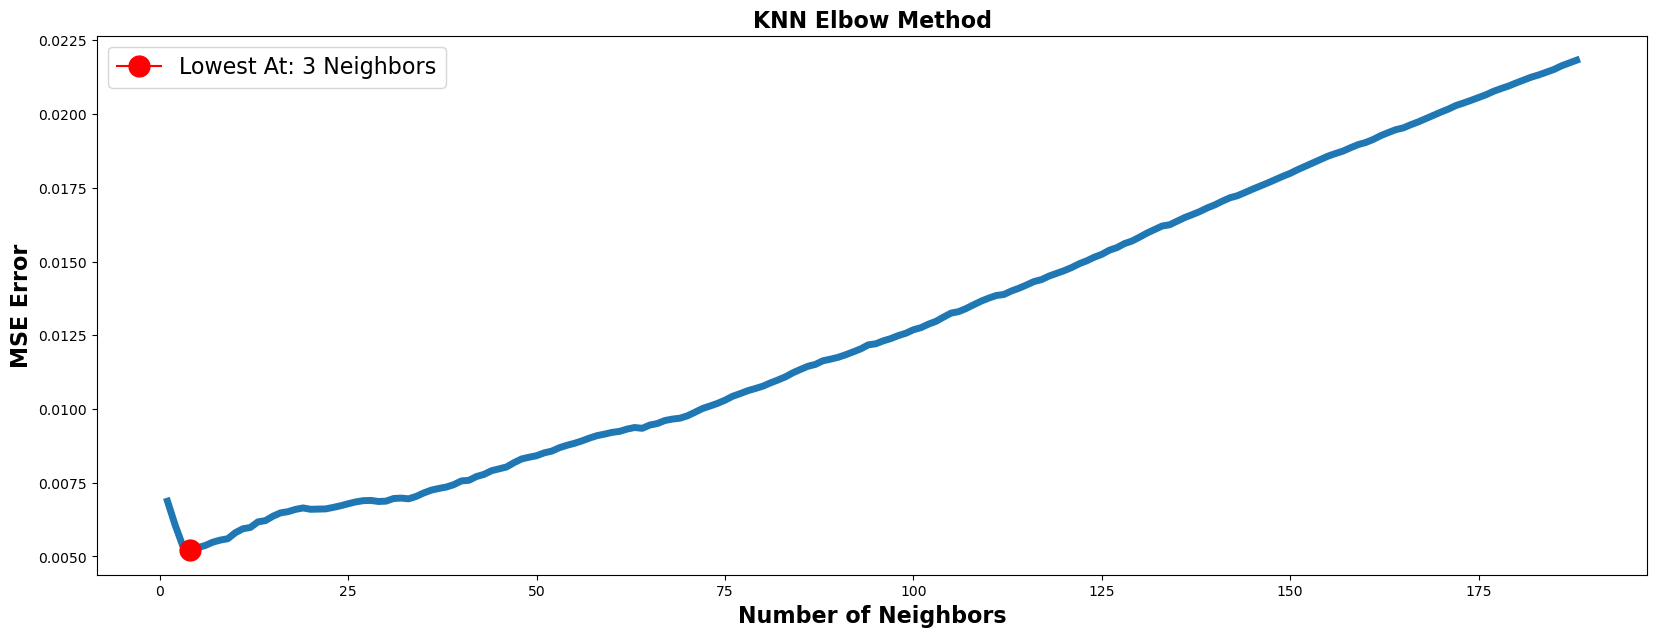

In [44]:
index = error_rate.index(min(error_rate))

plt.figure(figsize = (20,7))
plt.plot(list(range(1, l_df.shape[0])), error_rate, linewidth = 5)
plt.plot(list(range(1, l_df.shape[0]))[index], error_rate[index], marker = 'o', markersize = 15, color = "red", label = f"Lowest At: {index} Neighbors")
plt.ylabel("MSE Error", fontweight = "bold", fontsize = 16)
plt.xlabel("Number of Neighbors", fontweight = "bold", fontsize = 16)
plt.title("KNN Elbow Method", fontweight = "bold", fontsize = 16)
plt.legend(loc = "upper left", fontsize = 16)
plt.show()

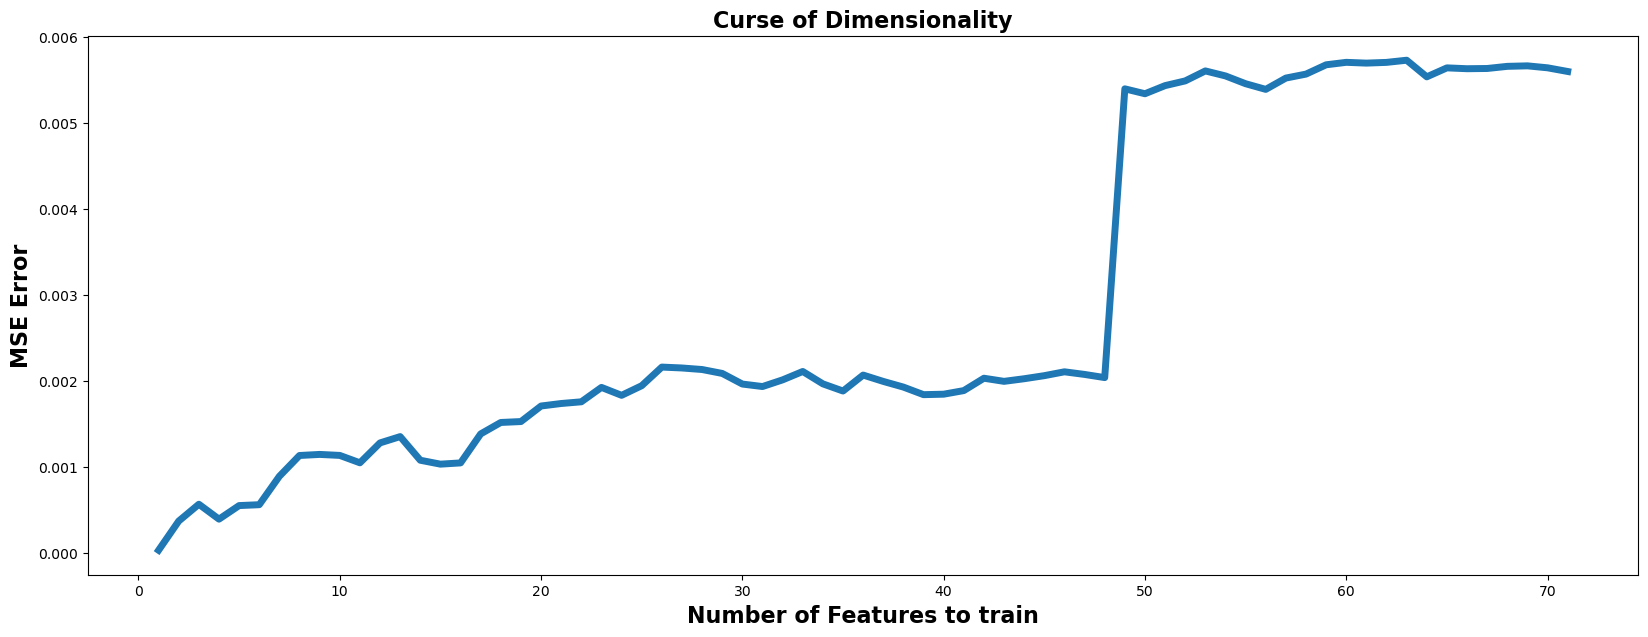

In [45]:
x = sl_df.drop(["Energy With Dietary Fibre, Equated (Kj)"] + string_columns, axis = 1)
y = sl_df["Energy With Dietary Fibre, Equated (Kj)"]

error_rate = []
for i in range(1, len(x.columns)):
    selector = SelectKBest(f_classif, k = i)
    x_new = selector.fit_transform(x, y)
    selected_features = x.columns[selector.get_support(indices = True)]
    
    knn = KNeighborsRegressor(n_neighbors = 9)
    knn.fit(sl_df[selected_features], sl_df["Energy With Dietary Fibre, Equated (Kj)"])
    knn_predicted = knn.predict(l_df[selected_features])
    mse = mean_squared_error(l_df["Energy With Dietary Fibre, Equated (Kj)"], knn_predicted)
    error_rate.append(mse)

plt.figure(figsize = (20,7))
plt.plot(list(range(1, len(x.columns))), error_rate, linewidth = 5)
#plt.plot(list(range(1, l_df.shape[0]))[index], error_rate[index], marker = 'o', markersize = 15, color = "red")
plt.ylabel("MSE Error", fontweight = "bold", fontsize = 16)
plt.xlabel("Number of Features to train", fontweight = "bold", fontsize = 16)
plt.title("Curse of Dimensionality", fontweight = "bold", fontsize = 16)
plt.show()

# Descision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

features = total_df.drop(["Type"], axis = 1)
labels = list(total_df["Type"])

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

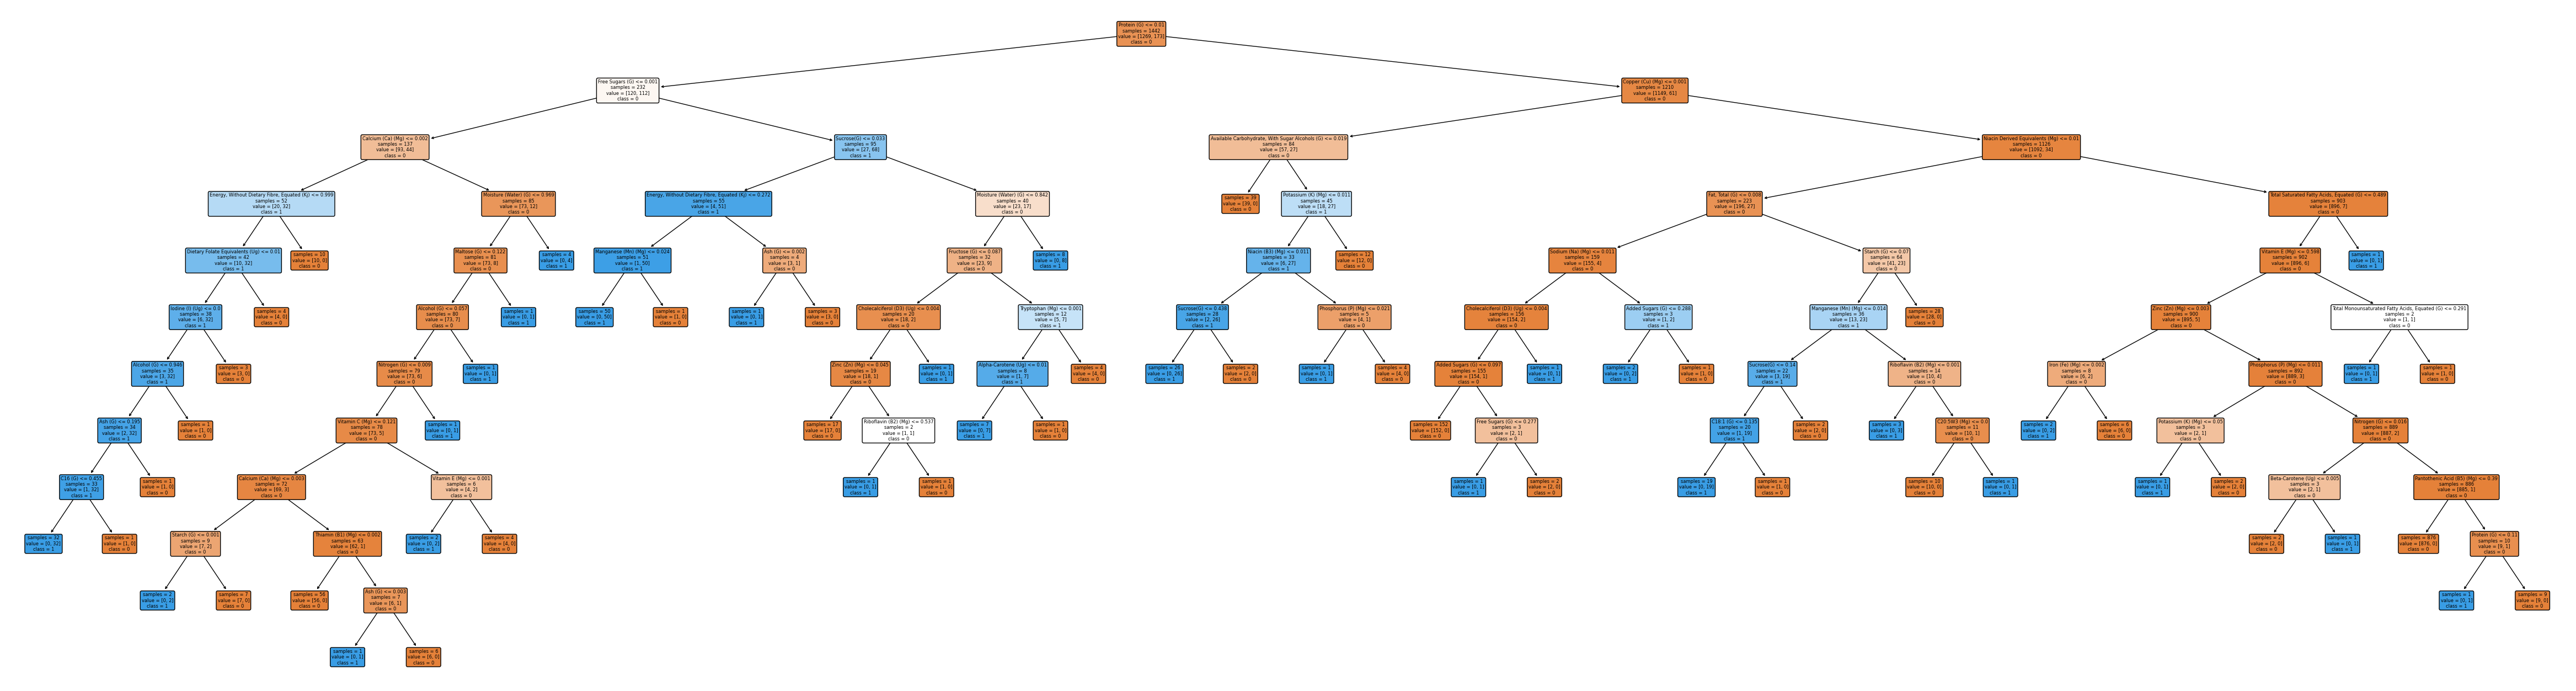

In [47]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(60, 16))
tree.plot_tree(clf, feature_names=features.columns, class_names=list(set([str(int(i)) for i in labels])), filled=True, 
               fontsize = 6, rounded = True, proportion = False, impurity = False)
plt.show()

# SVM Regression

In [48]:
from sklearn.svm import SVR

target = "Protein (G)"
x_train = sl_df.drop(string_columns + [target], axis = 1).values
y_train = sl_df[target]
x_test = l_df.drop(string_columns + [target], axis = 1).values
y_test = l_df[target]

In [49]:
svr_linear = SVR(kernel='linear', C=1.0, epsilon=0.2)
svr_poly = SVR(kernel='poly', degree=3, C=1.0, epsilon=0.2)
svr_rbf = SVR(kernel='rbf', C=1.0, epsilon=0.2)

svr_linear.fit(x_train, y_train)
svr_poly.fit(x_train, y_train)
svr_rbf.fit(x_train, y_train)

y_linear = svr_linear.predict(x_test)
y_poly = svr_poly.predict(x_test)
y_rbf = svr_rbf.predict(x_test)

In [50]:
linear_mse = mean_squared_error(y_test, y_linear)
print("Linear Mean Squared Error:", linear_mse)
poly_mse = mean_squared_error(y_test, y_poly)
print("Poly Mean Squared Error:", poly_mse)
rbf_mse = mean_squared_error(y_test, y_rbf)
print("RBF Mean Squared Error:", rbf_mse)

Linear Mean Squared Error: 0.029310455927887898
Poly Mean Squared Error: 0.0345621818615044
RBF Mean Squared Error: 0.035048448419474985


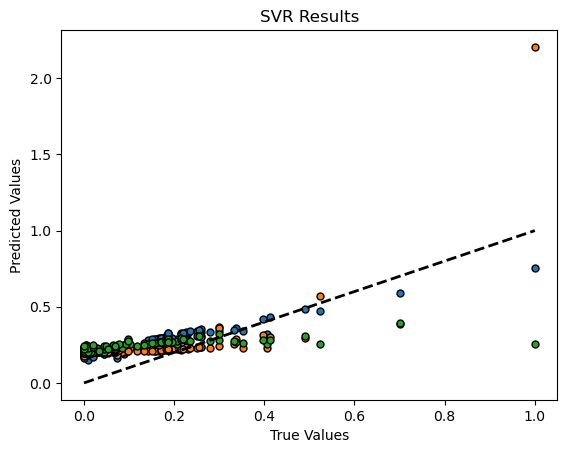

In [51]:
plt.scatter(y_test, y_linear, s = 25, edgecolor = "black")
plt.scatter(y_test, y_poly, s = 25, edgecolor = "black")
plt.scatter(y_test, y_rbf, s = 25, edgecolor = "black")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('SVR Results')
plt.show()

In [52]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

In [53]:
svr_linear = SVR(kernel='linear', C=1.0, epsilon=0.2)
svr_poly = SVR(kernel='poly', degree=3, C=1.0, epsilon=0.2)
svr_rbf = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr_sigmoid = SVR(kernel='sigmoid', C=1.0, epsilon=0.2)

svr_linear.fit(X_train_pca, y_train)
svr_poly.fit(X_train_pca, y_train)
svr_rbf.fit(X_train_pca, y_train)
svr_sigmoid.fit(X_train_pca, y_train)

y_linear = svr_linear.predict(X_test_pca)
y_poly = svr_poly.predict(X_test_pca)
y_rbf = svr_rbf.predict(X_test_pca)
y_sigmoid = svr_sigmoid.predict(X_test_pca)

In [54]:
linear_mse = mean_squared_error(y_test, y_linear)
print("Linear Mean Squared Error:", linear_mse)
poly_mse = mean_squared_error(y_test, y_poly)
print("Poly Mean Squared Error:", poly_mse)
rbf_mse = mean_squared_error(y_test, y_rbf)
print("RBF Mean Squared Error:", rbf_mse)
sigmoid_mse = mean_squared_error(y_test, y_sigmoid)
print("sigmoid Mean Squared Error:", sigmoid_mse)

Linear Mean Squared Error: 0.02335673001419238
Poly Mean Squared Error: 0.03905006008520499
RBF Mean Squared Error: 0.030393205999674877
sigmoid Mean Squared Error: 1992.0083157997672


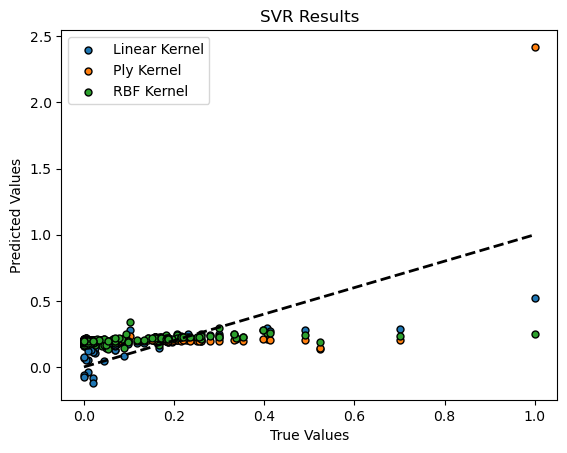

In [55]:
plt.scatter(y_test, y_linear, s = 25, edgecolor = "black", label = "Linear Kernel")
plt.scatter(y_test, y_poly, s = 25, edgecolor = "black", label = "Ply Kernel")
plt.scatter(y_test, y_rbf, s = 25, edgecolor = "black", label = "RBF Kernel")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('SVR Results')
plt.legend()
plt.show()

# SVM Classifier

In [187]:
from sklearn import svm

features = total_df.drop(["Type"], axis = 1)
labels = list(total_df["Type"])

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.15, random_state = 42)

clf = svm.SVC(kernel = "linear")
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1:", f1)

Accuracy: 0.8634686346863468
F1: 0.0975609756097561


In [190]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

features = total_df.drop(["Type"], axis = 1)
labels = [int(i) for i in list(total_df["Type"])]

count = 0
for i in labels:
    if(i == 1):
        count = count + 1

undersampler = RandomUnderSampler(sampling_strategy={0: count, 1: count}, random_state = 42)
X_res, y_res = undersampler.fit_resample(features, labels)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size = 0.15, random_state = 42)

pca = PCA(n_components = 10)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

clf = svm.SVC(kernel = "linear")
clf.fit(x_train_pca, y_train)

y_pred = clf.predict(x_test_pca)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1:", f1)

Accuracy: 0.8805970149253731
F1: 0.8787878787878788


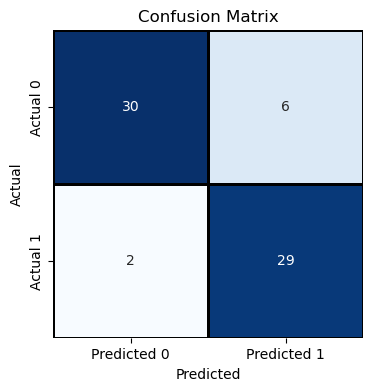

In [191]:
cm = confusion_matrix(list(y_test), y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, linecolor = "black", linewidths = 2,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()